# Librerias para el analisis exploratorio de datos, visualizacion, tratamiento y modelo predictivo

In [56]:
import pandas as pd
import numpy as np
import sys, os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier   





# Tratamiento de datos

In [57]:
#importacion de datos
import pandas as pd
data = pd.read_csv('C:/Users/amcor/Documents/CURSO-IA/github/AI-Diabetes-Aleja/diabetes_data.csv')
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Se renombran las columnas para tener una mayor claridad y se explica que significa cada una. Informacion obtenida de Kaggle
data.columns = [
	'edad',  # Edad del paciente
	'sexo', # 1 masculino, 0 femenino
	'colesterol_alto', # 1 si, 0 no
	'control_colesterol', # 1 ultimos 5 años, 0 no
	'imc', # indice de masa corporal
	'fumador', # 1 si ha fumado 100 cigarrillos en la vida, 0 no
	'enfermedad_cardiaca_o_infarto', # 1 si, 0 no
	'actividad_fisica', # 1 si ultimos 30 días, 0 no
	'frutas', # 1 si una fruta por dia, 0 no
	'verduras', # 1 si una verdura por dia, 0 no
	'consumo_excesivo_alcohol', # 1 si consume 14 bebidas por semana hombres y 7 mujeres, 0 no
	'salud_general', # 1 excelente, 2 muy buena, 3 buena, 4 regular, 5 mala
	'salud_mental', # dias de mala salud mental en el ultimo mes
	'salud_fisica', # dias de mala salud fisica en el ultimo mes
	'dificultad_para_caminar', # 1 si, 0 no
	'accidente_cerebrovascular', # 1 si, 0 no
	'hipertension', # 1 si, 0 no
	'diabetes' # 1 si, 0 no
]
data.head()


,edad,sexo,colesterol_alto,control_colesterol,imc,fumador,enfermedad_cardiaca_o_infarto,actividad_fisica,frutas,verduras,consumo_excesivo_alcohol,salud_general,salud_mental,salud_fisica,dificultad_para_caminar,accidente_cerebrovascular,hipertension,diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Se ajusta la edad de los pacientes, debido a que viene en intervalo 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older. Definido poir Kaggle
data_1 = data.copy()
data_1['edad'] = data_1['edad'] * 5 + 13
data_1['edad'] = data_1['edad'].replace({118: 80})
data_1['edad'].head()

0    33.0
1    73.0
2    78.0
3    68.0
4    53.0
Name: edad, dtype: float64

In [60]:
#Identificacion de valores nulos
data_1.isnull().sum()

#No hay valores nulos en el dataset

edad                             0
sexo                             0
colesterol_alto                  0
control_colesterol               0
imc                              0
fumador                          0
enfermedad_cardiaca_o_infarto    0
actividad_fisica                 0
frutas                           0
verduras                         0
consumo_excesivo_alcohol         0
salud_general                    0
salud_mental                     0
salud_fisica                     0
dificultad_para_caminar          0
accidente_cerebrovascular        0
hipertension                     0
diabetes                         0
dtype: int64

# Analisis exploratorio

In [61]:
# Que porcentaje de pacientes tienen diabetes
porcentaje_diabetes = data_1['diabetes'].mean() * 100
print(f'Porcentaje de pacientes con diabetes: {porcentaje_diabetes:.2f}%')

Porcentaje de pacientes con diabetes: 50.00%


In [62]:
# Que porcentaje de hombres y mujeres tienen diabetes
hombres_diabetes = data_1[data_1['sexo'] == 1]['diabetes'].mean() * 100
print(f'Porcentaje de hombres con diabetes: {hombres_diabetes:.2f}%')
mujeres_diabetes = data_1[data_1['sexo'] == 0]['diabetes'].mean() * 100
print(f'Porcentaje de mujeres con diabetes: {mujeres_diabetes:.2f}%')

Porcentaje de hombres con diabetes: 52.42%
Porcentaje de mujeres con diabetes: 47.96%


Porcentaje de diabetes por grupo etario:
grupo_edad
18-30    12.025316
31-45    31.192409
46-60    51.135342
61-75    62.163497
76-90    59.141172
Name: diabetes, dtype: float64


C:\Users\amcor\AppData\Local\Temp\ipykernel_2020\3970736038.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_edad_diabetes = data_1.groupby('grupo_edad')['diabetes'].mean() * 100
C:\Users\amcor\AppData\Local\Temp\ipykernel_2020\3970736038.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_edad_diabetes.index, y=grupo_edad_diabetes.values, palette='viridis')


Text(0.5, 1.0, 'Porcentaje de diabetes por grupo etario')

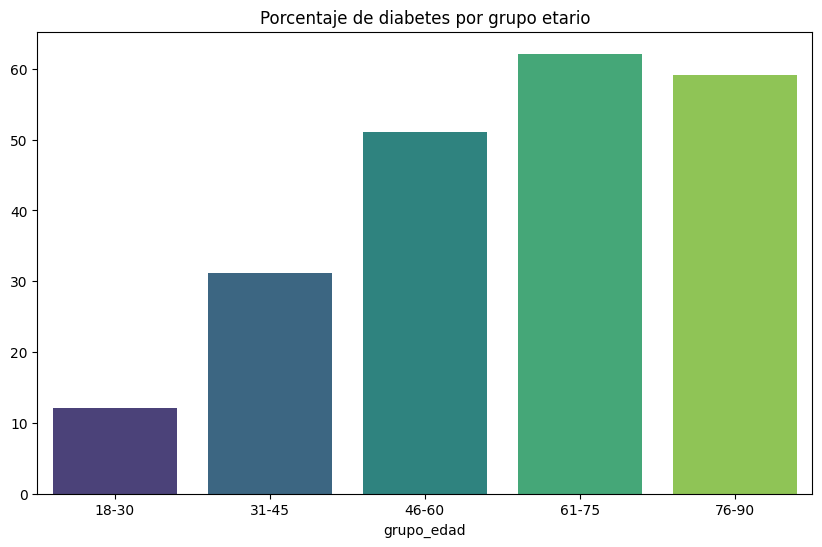

In [63]:
# Que grupo etario tiene mayor incidencia de diabetes
import matplotlib.pyplot as plt
import seaborn as sns

data_1['grupo_edad'] = pd.cut(data_1['edad'], bins=[17, 30, 45, 60, 75, 90], labels=['18-30', '31-45', '46-60', '61-75', '76-90'])
grupo_edad_diabetes = data_1.groupby('grupo_edad')['diabetes'].mean() * 100
print('Porcentaje de diabetes por grupo etario:')
print(grupo_edad_diabetes)

#grafico de barras del porcentaje de diabetes por grupo etario
plt.figure(figsize=(10, 6))
sns.barplot(x=grupo_edad_diabetes.index, y=grupo_edad_diabetes.values, palette='viridis')
plt.title('Porcentaje de diabetes por grupo etario')

# Los datos muestran que a mayor edad, mayor es la incidencia de diabetes, siendo el grupo de 76-90 años el que presenta el mayor porcentaje de casos.

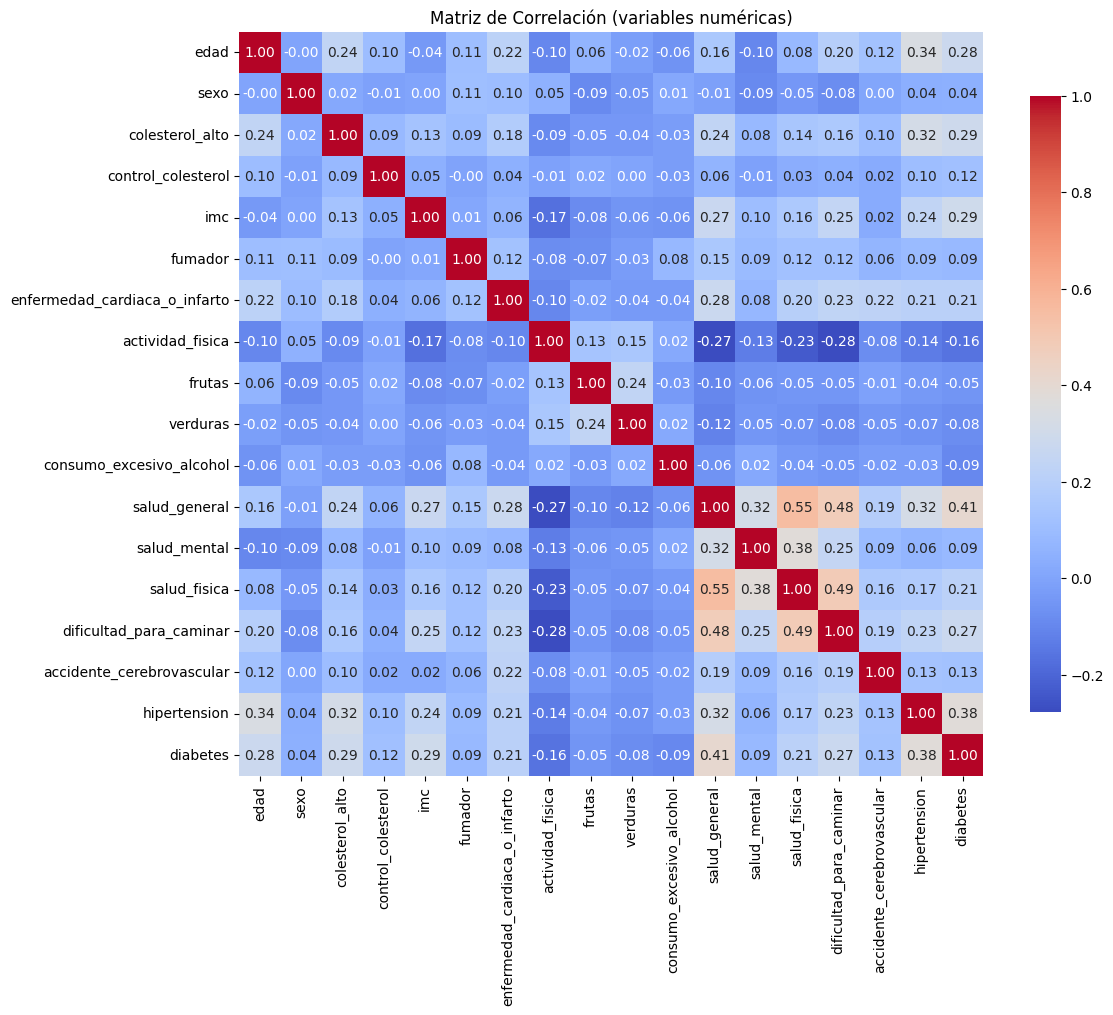

In [64]:
import numpy as np
# Matriz de correlacion (usar solo columnas numéricas para evitar errores con categorías)
plt.figure(figsize=(12, 10))
numeric_cols = data_1.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación (variables numéricas)")
plt.show()

In [65]:
# Se identifa que las variables con una mayor correlacion con la variable objetivo 'diabetes' son: edad, colesterol_alto, imc,
# enfermedad_cardiaca_o_infarto, salud_general, salud_fisica, dificultad_para_caminar, accidente_cerebrovascular e hipertension.
# Todas con una correlación positiva, indicando que a mayor valor en estas variables, mayor es la probabilidad de tener diabetes.



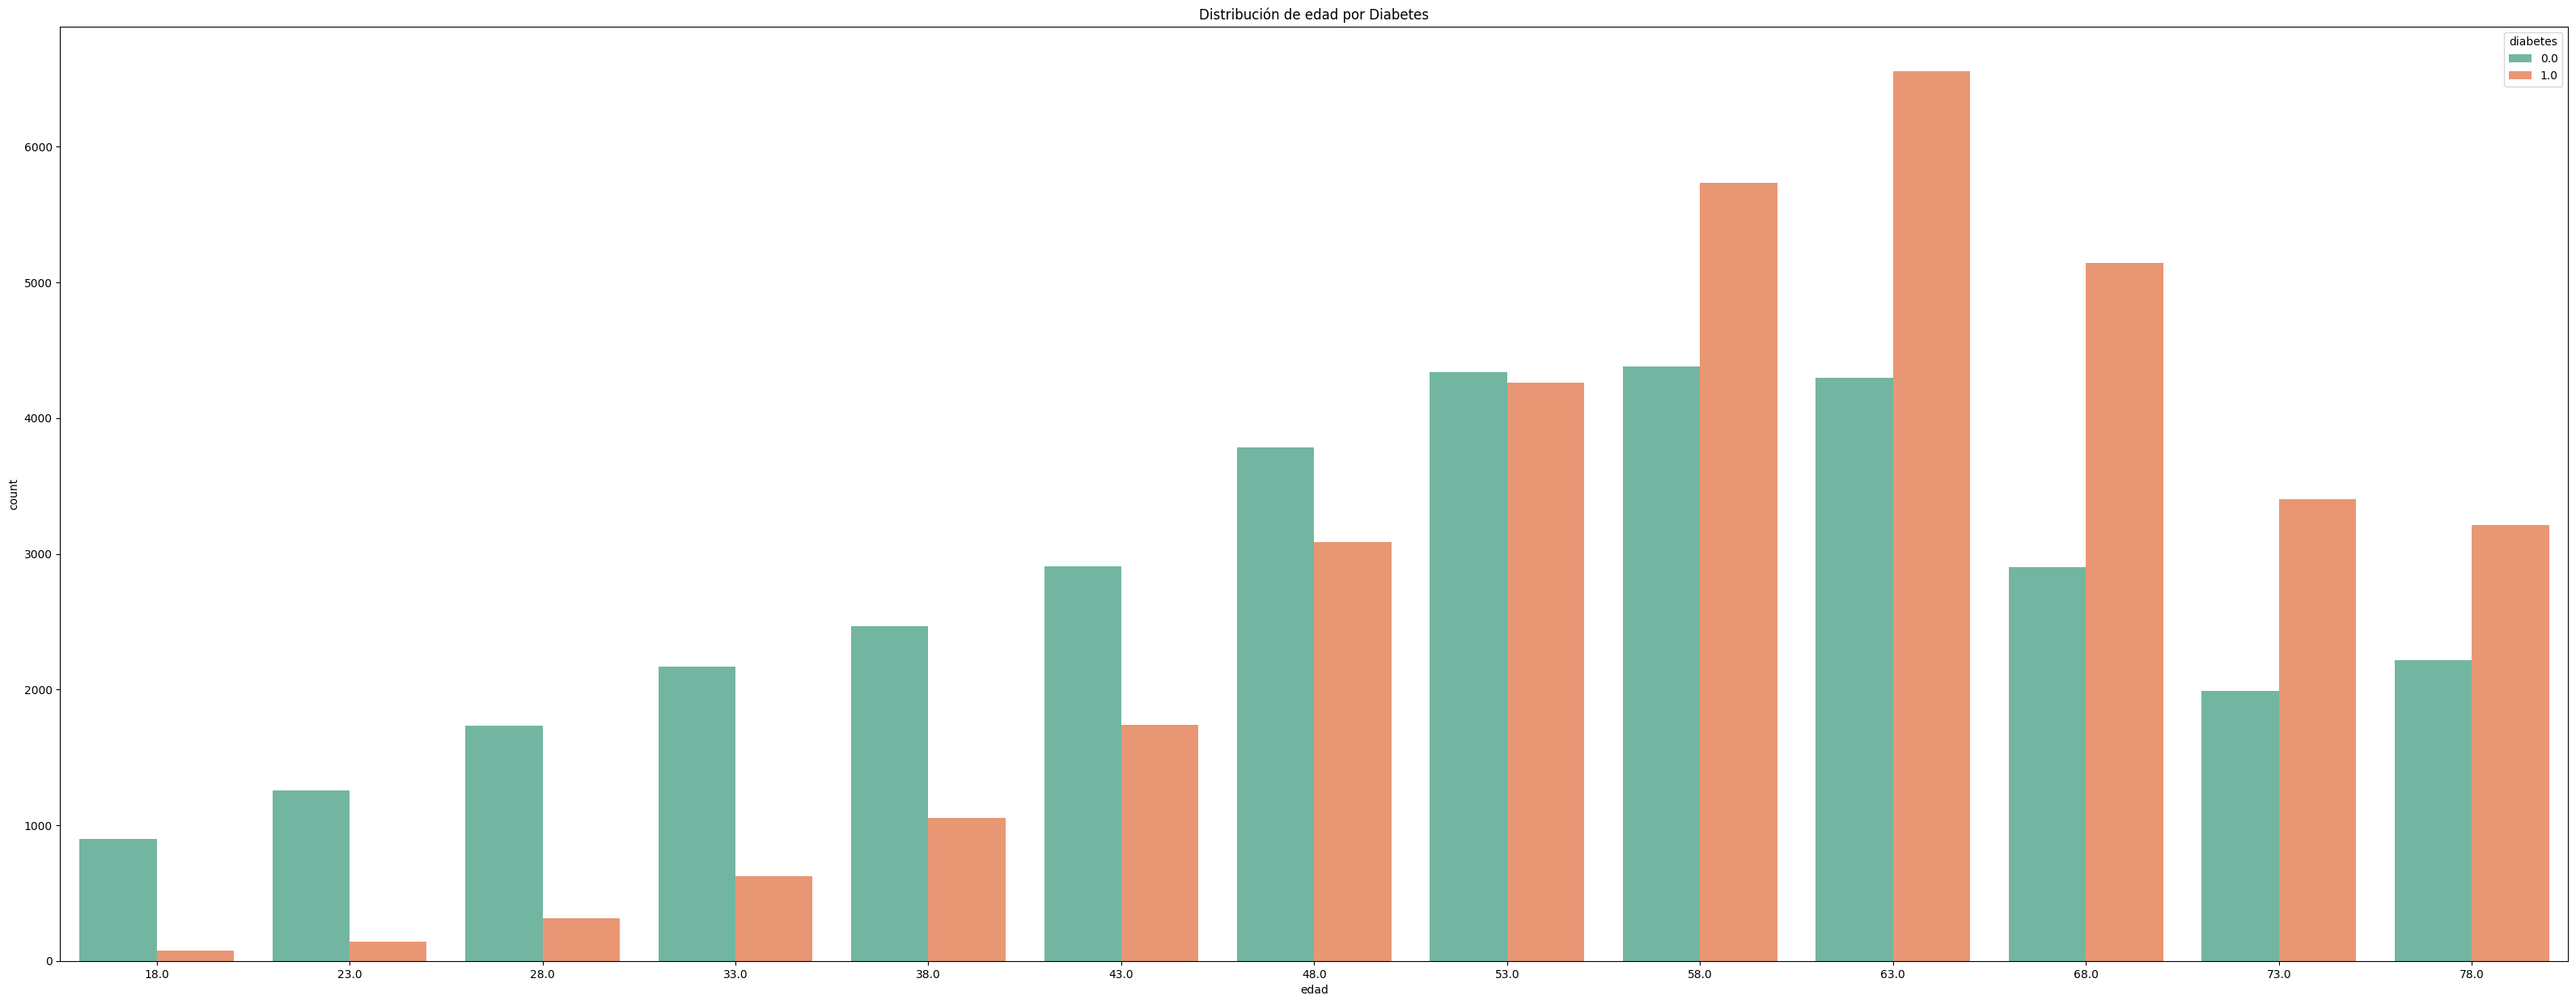

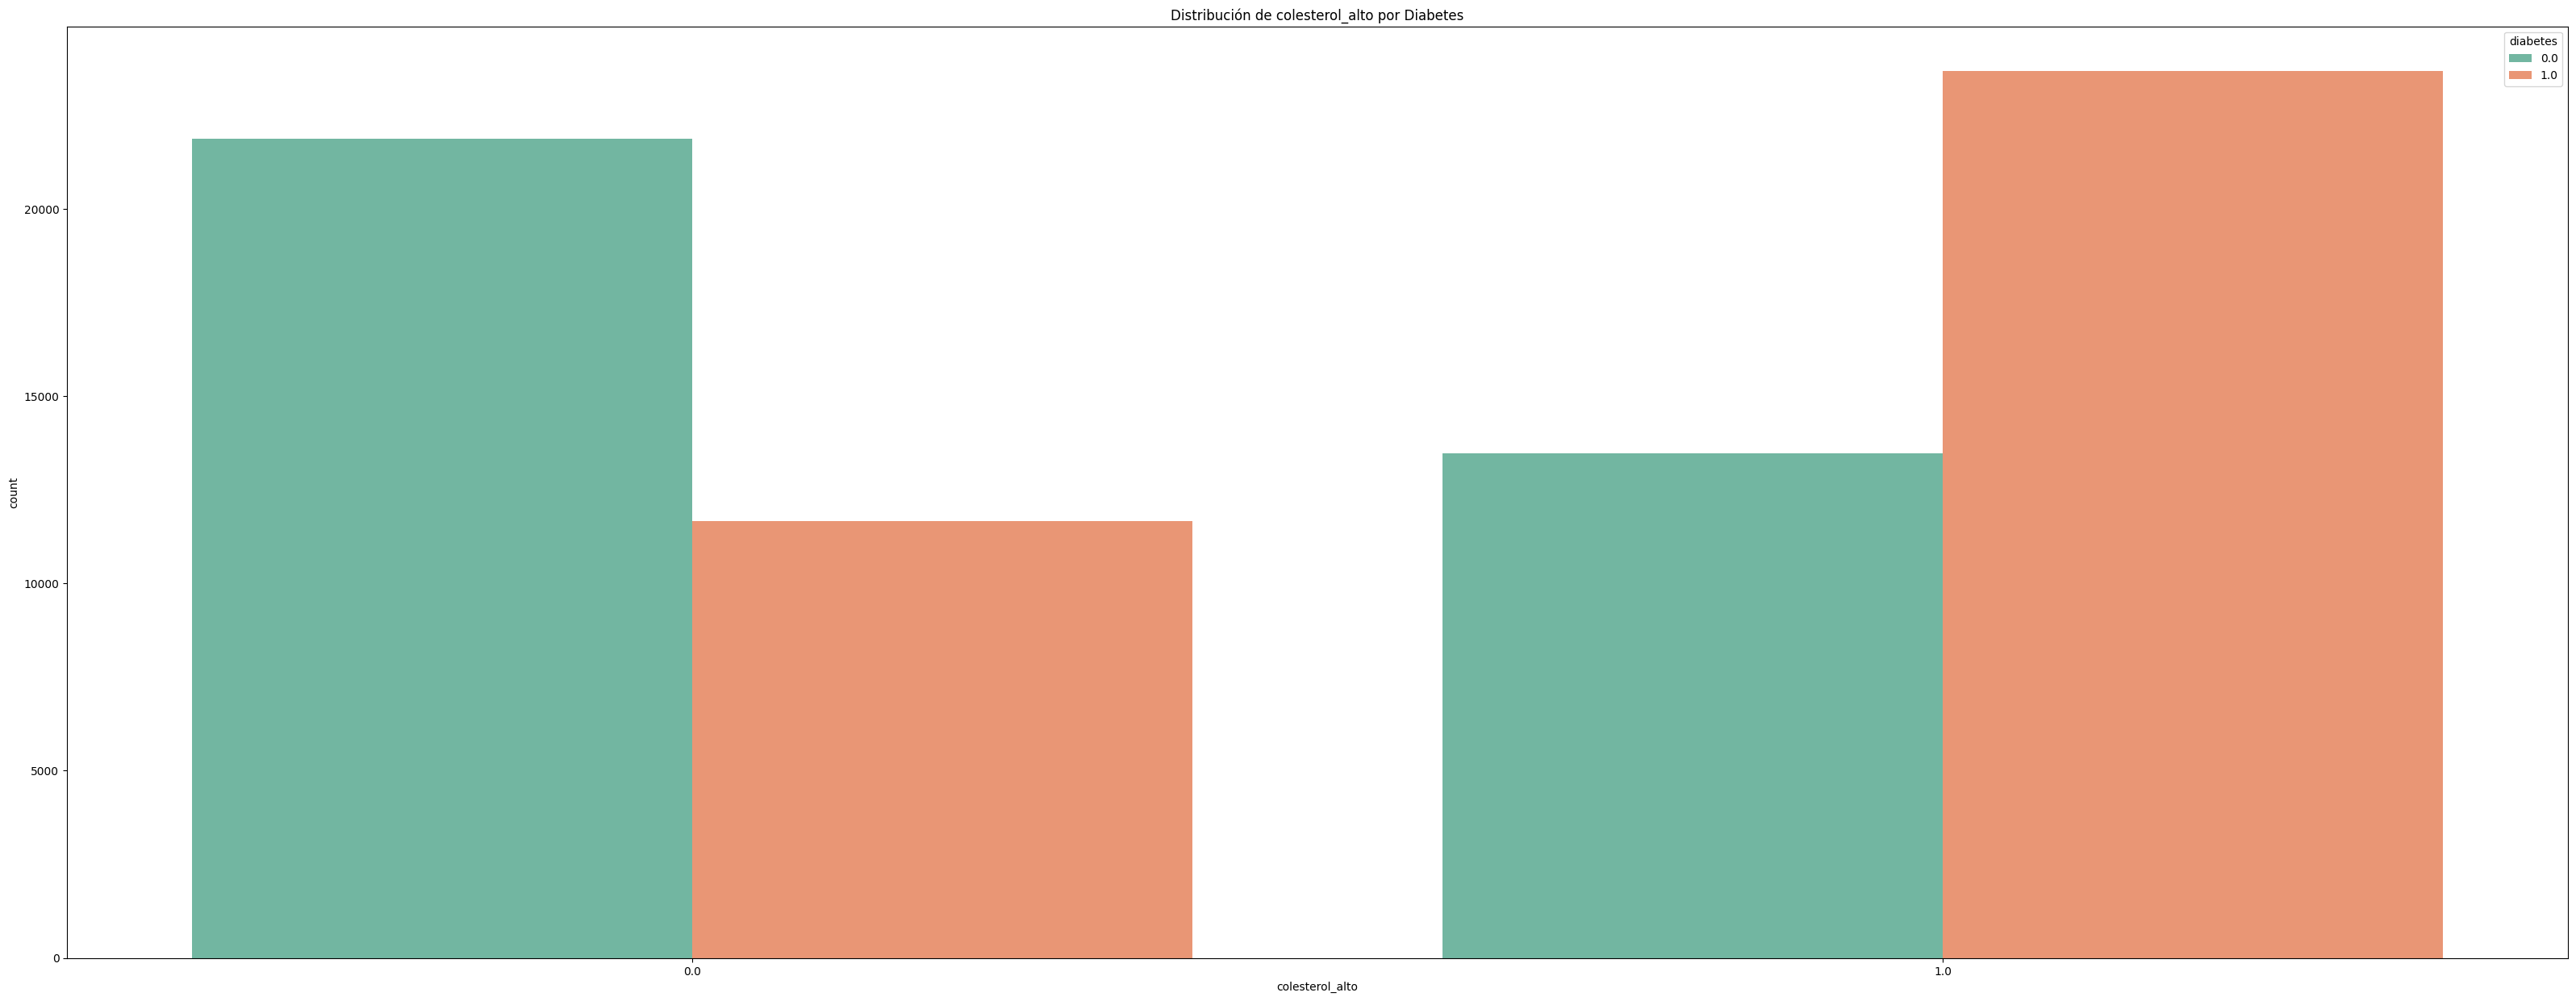

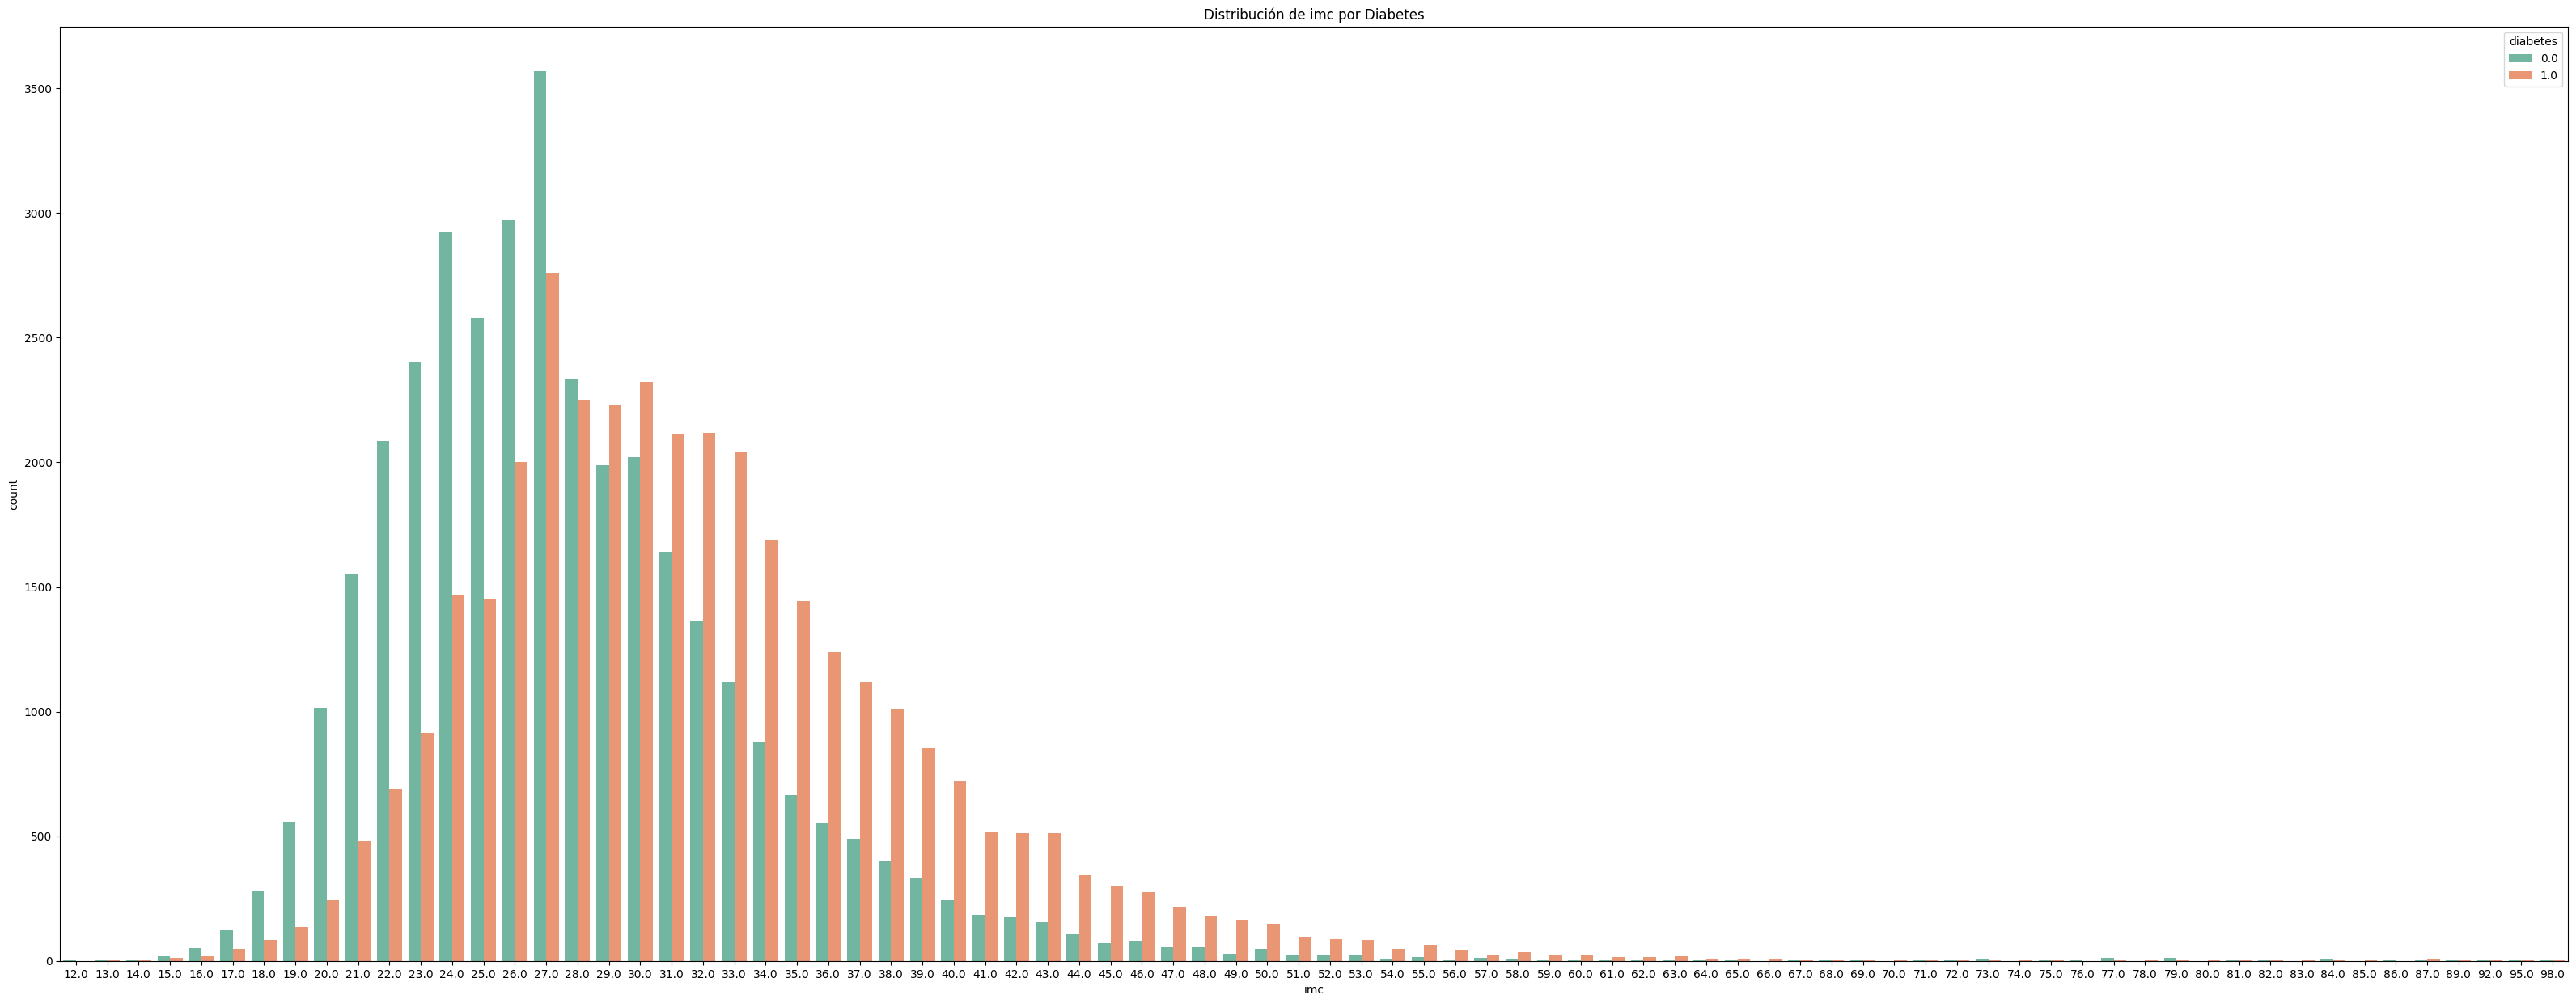

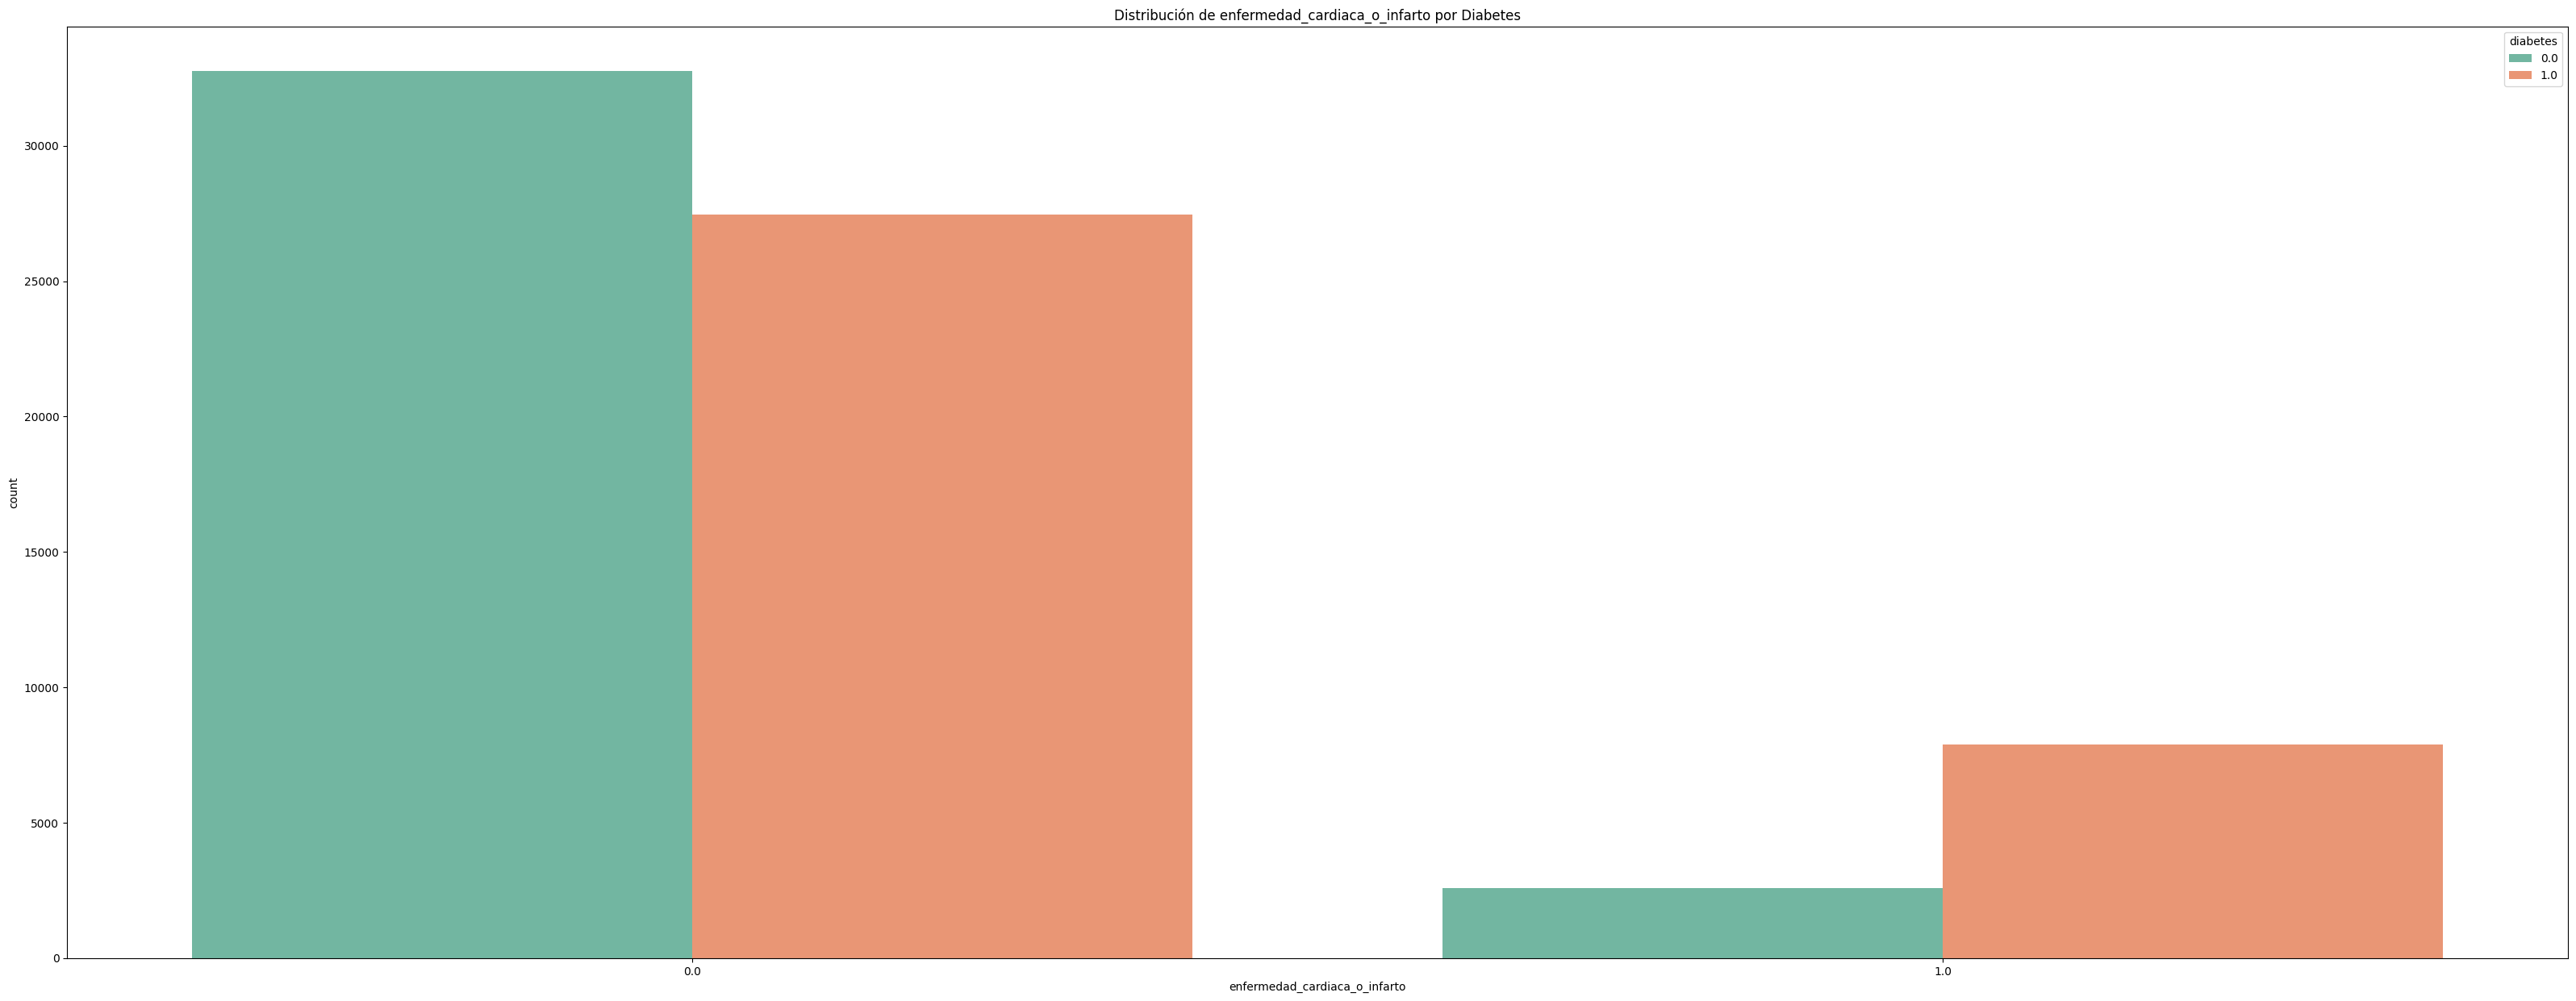

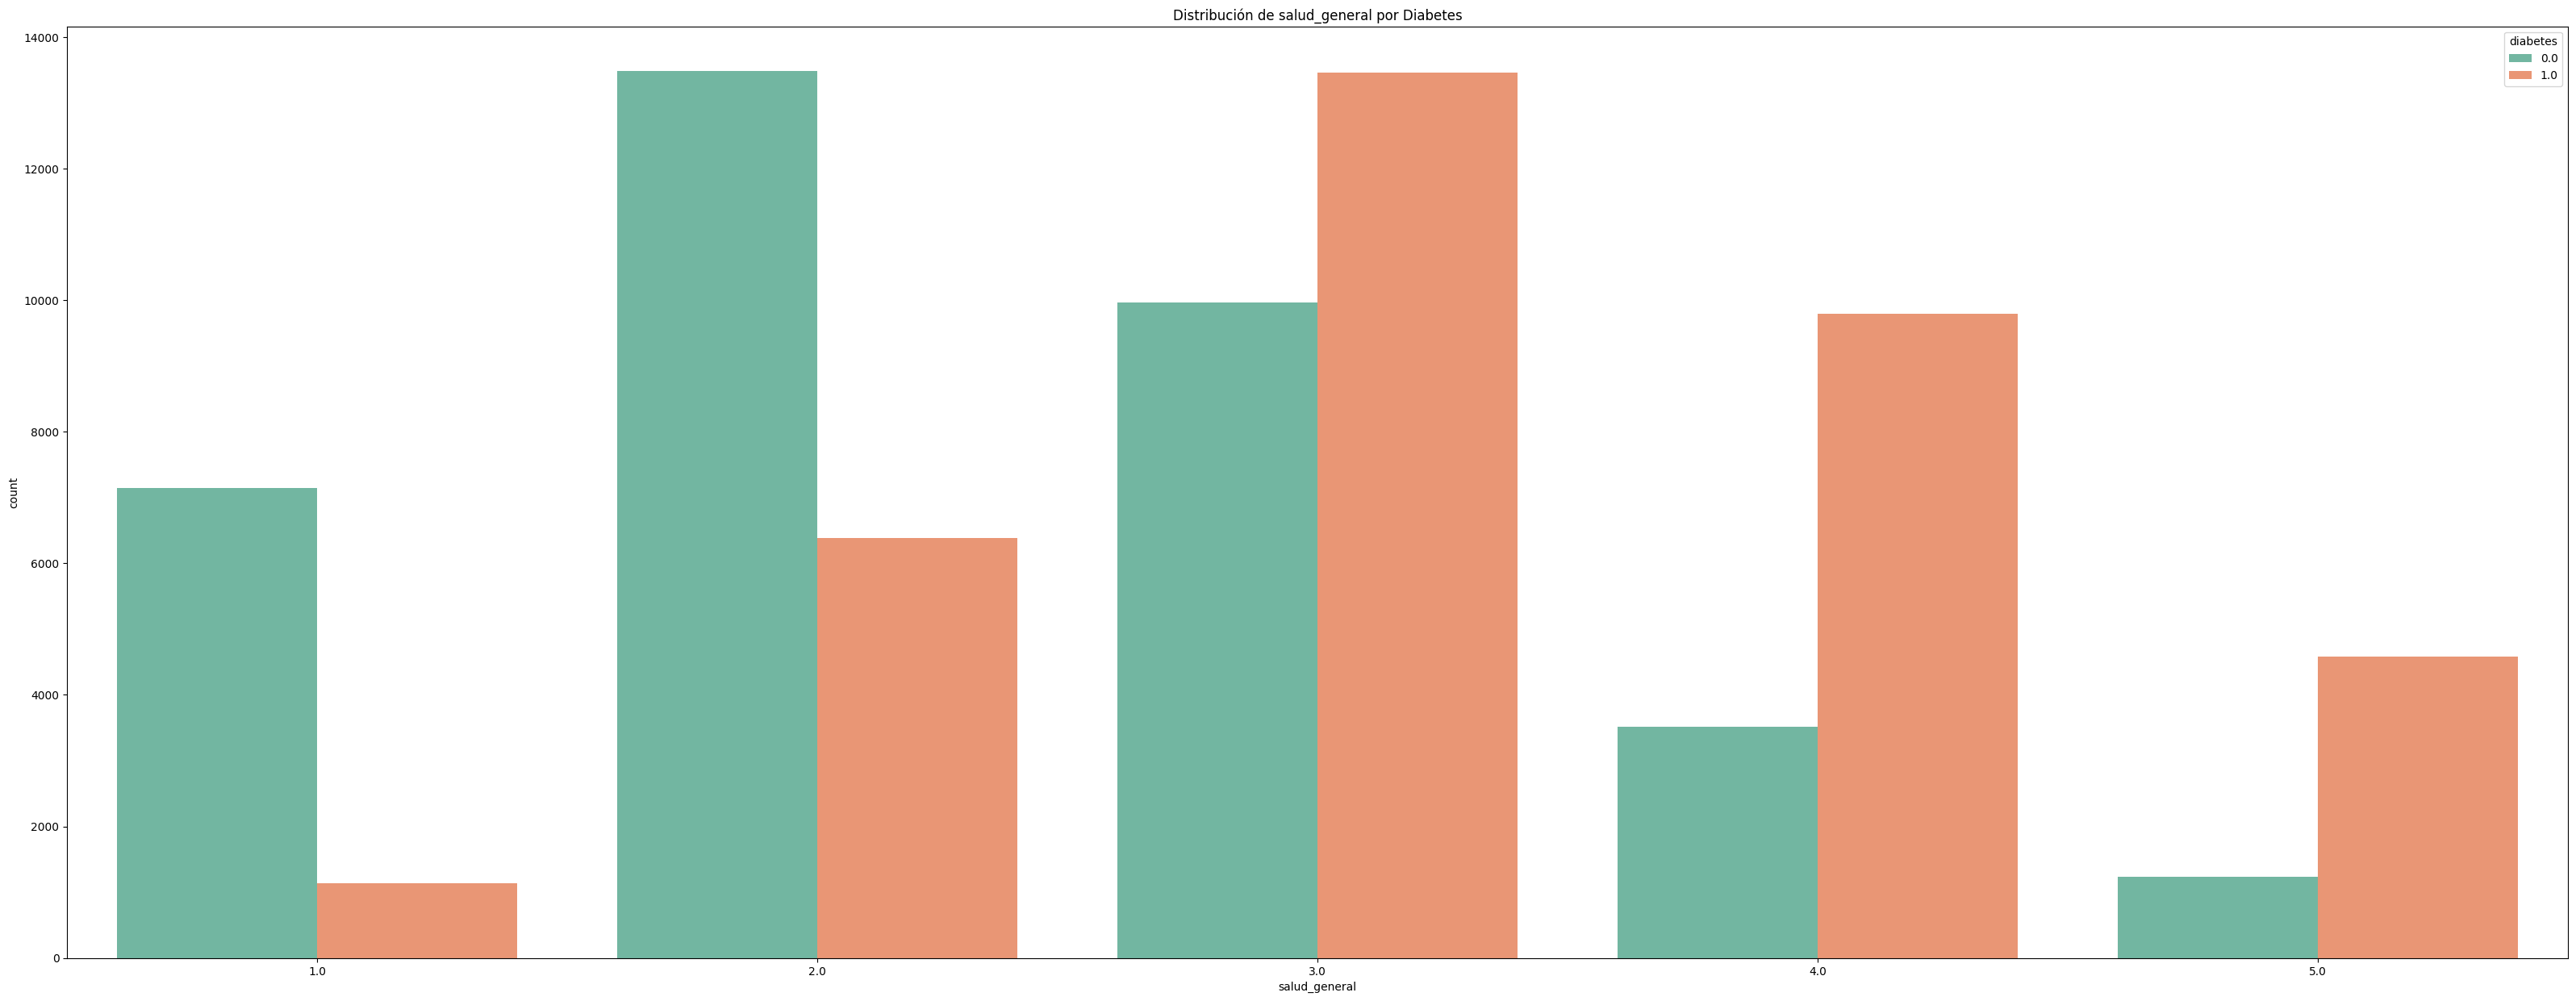

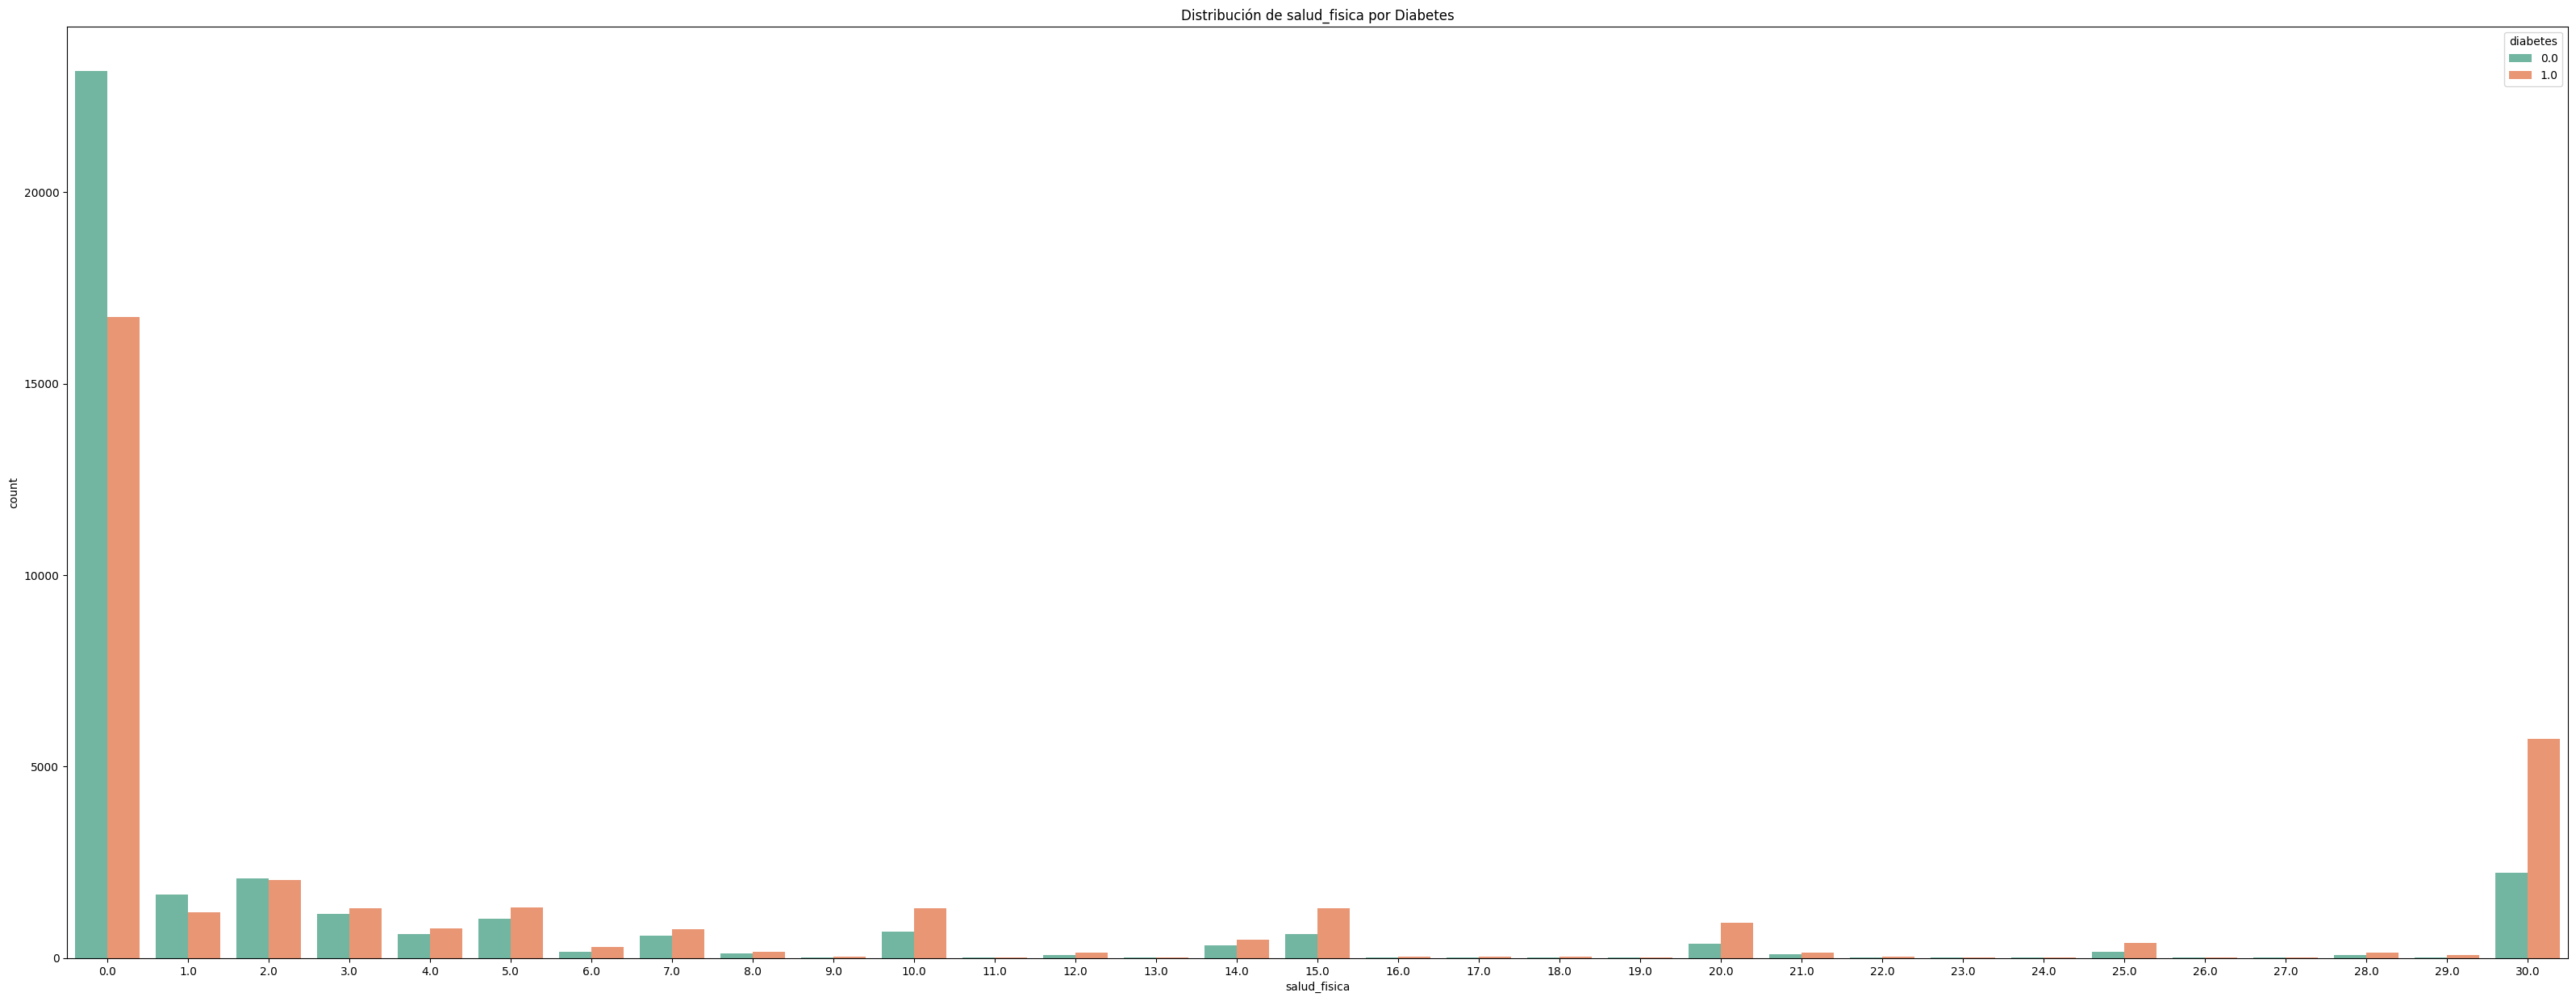

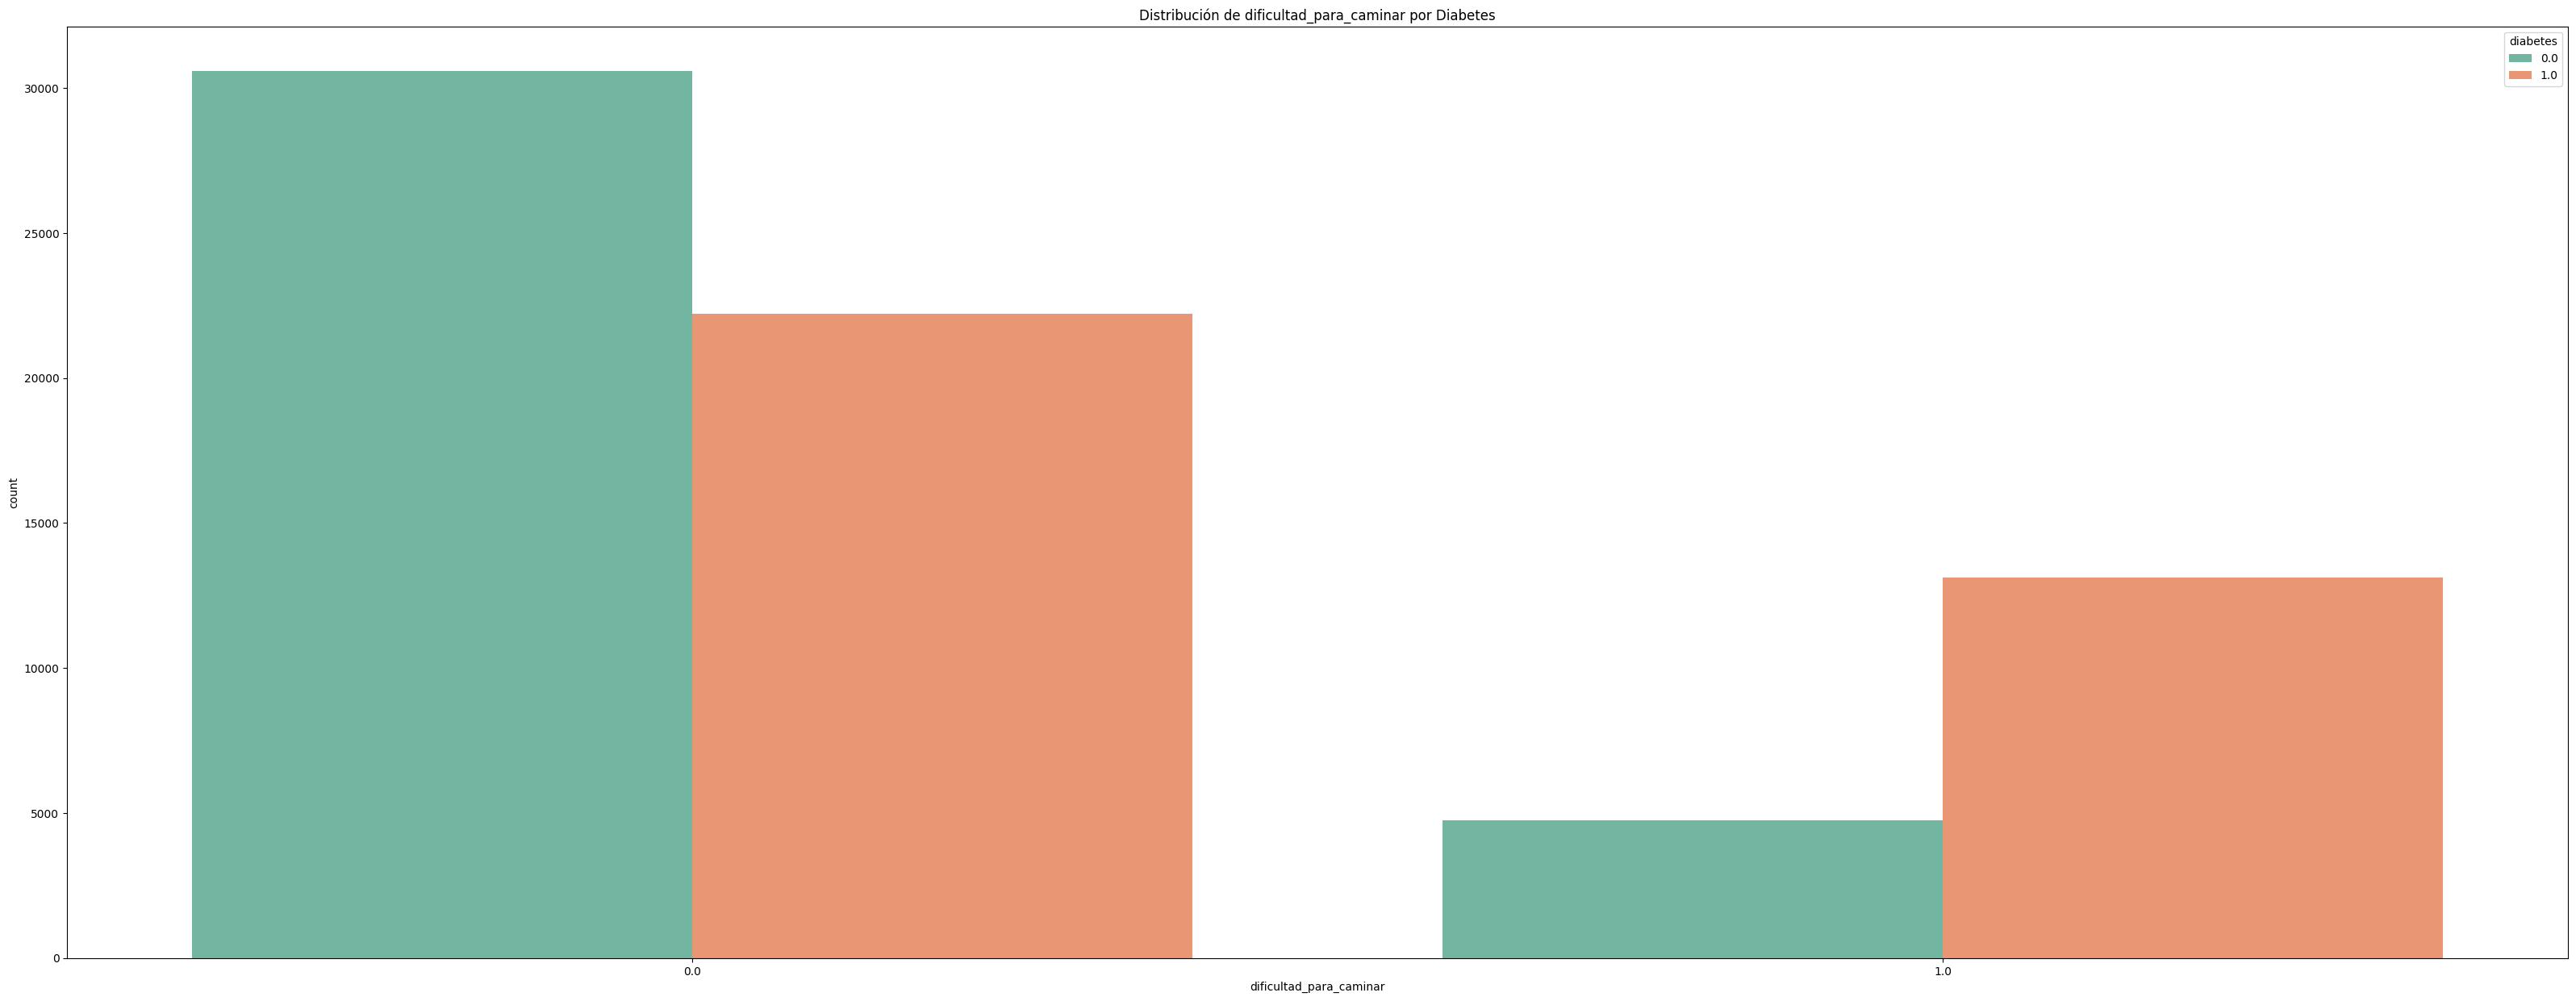

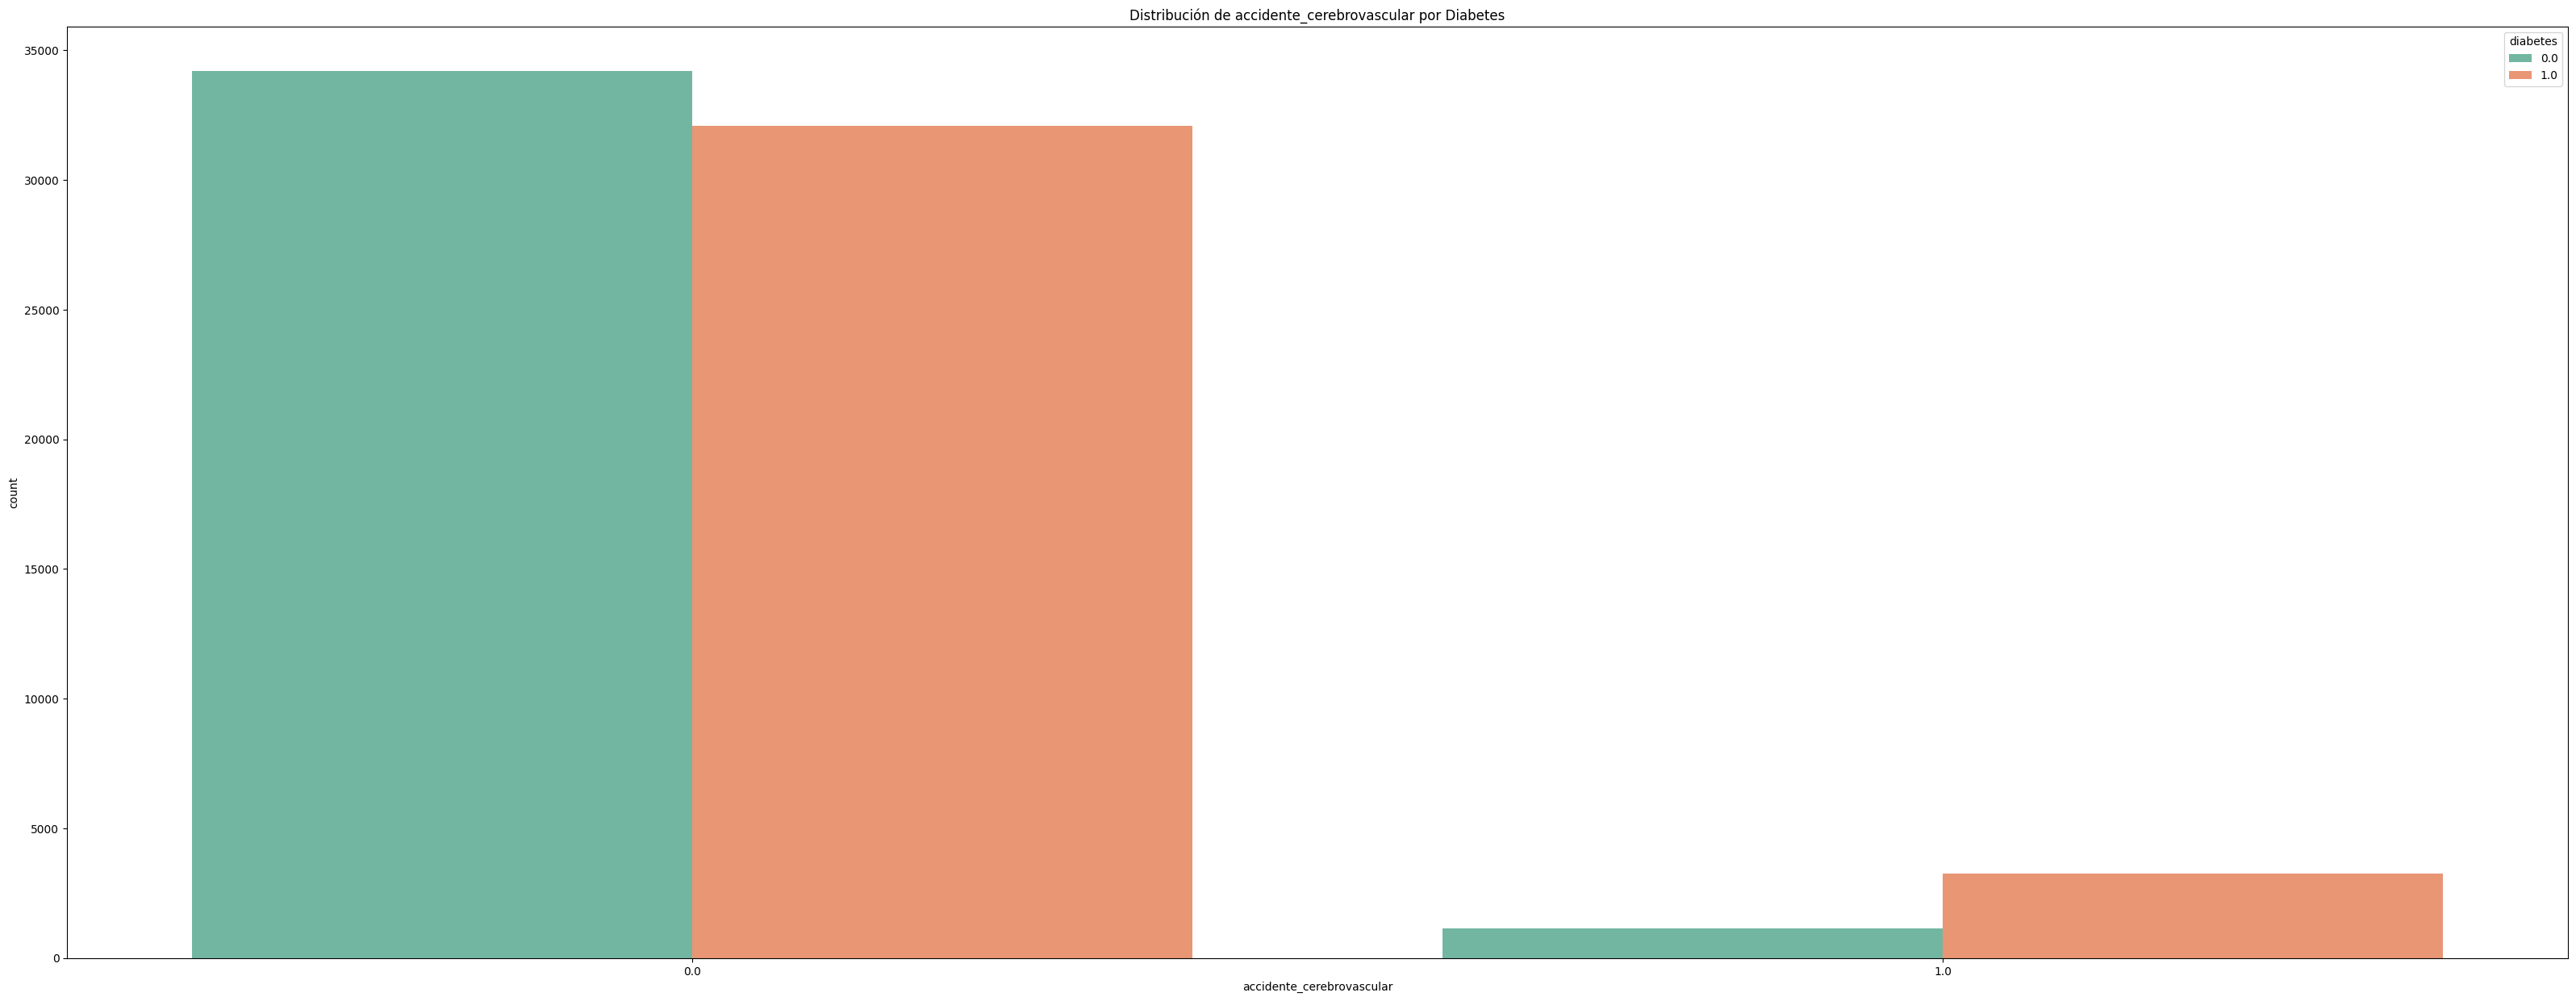

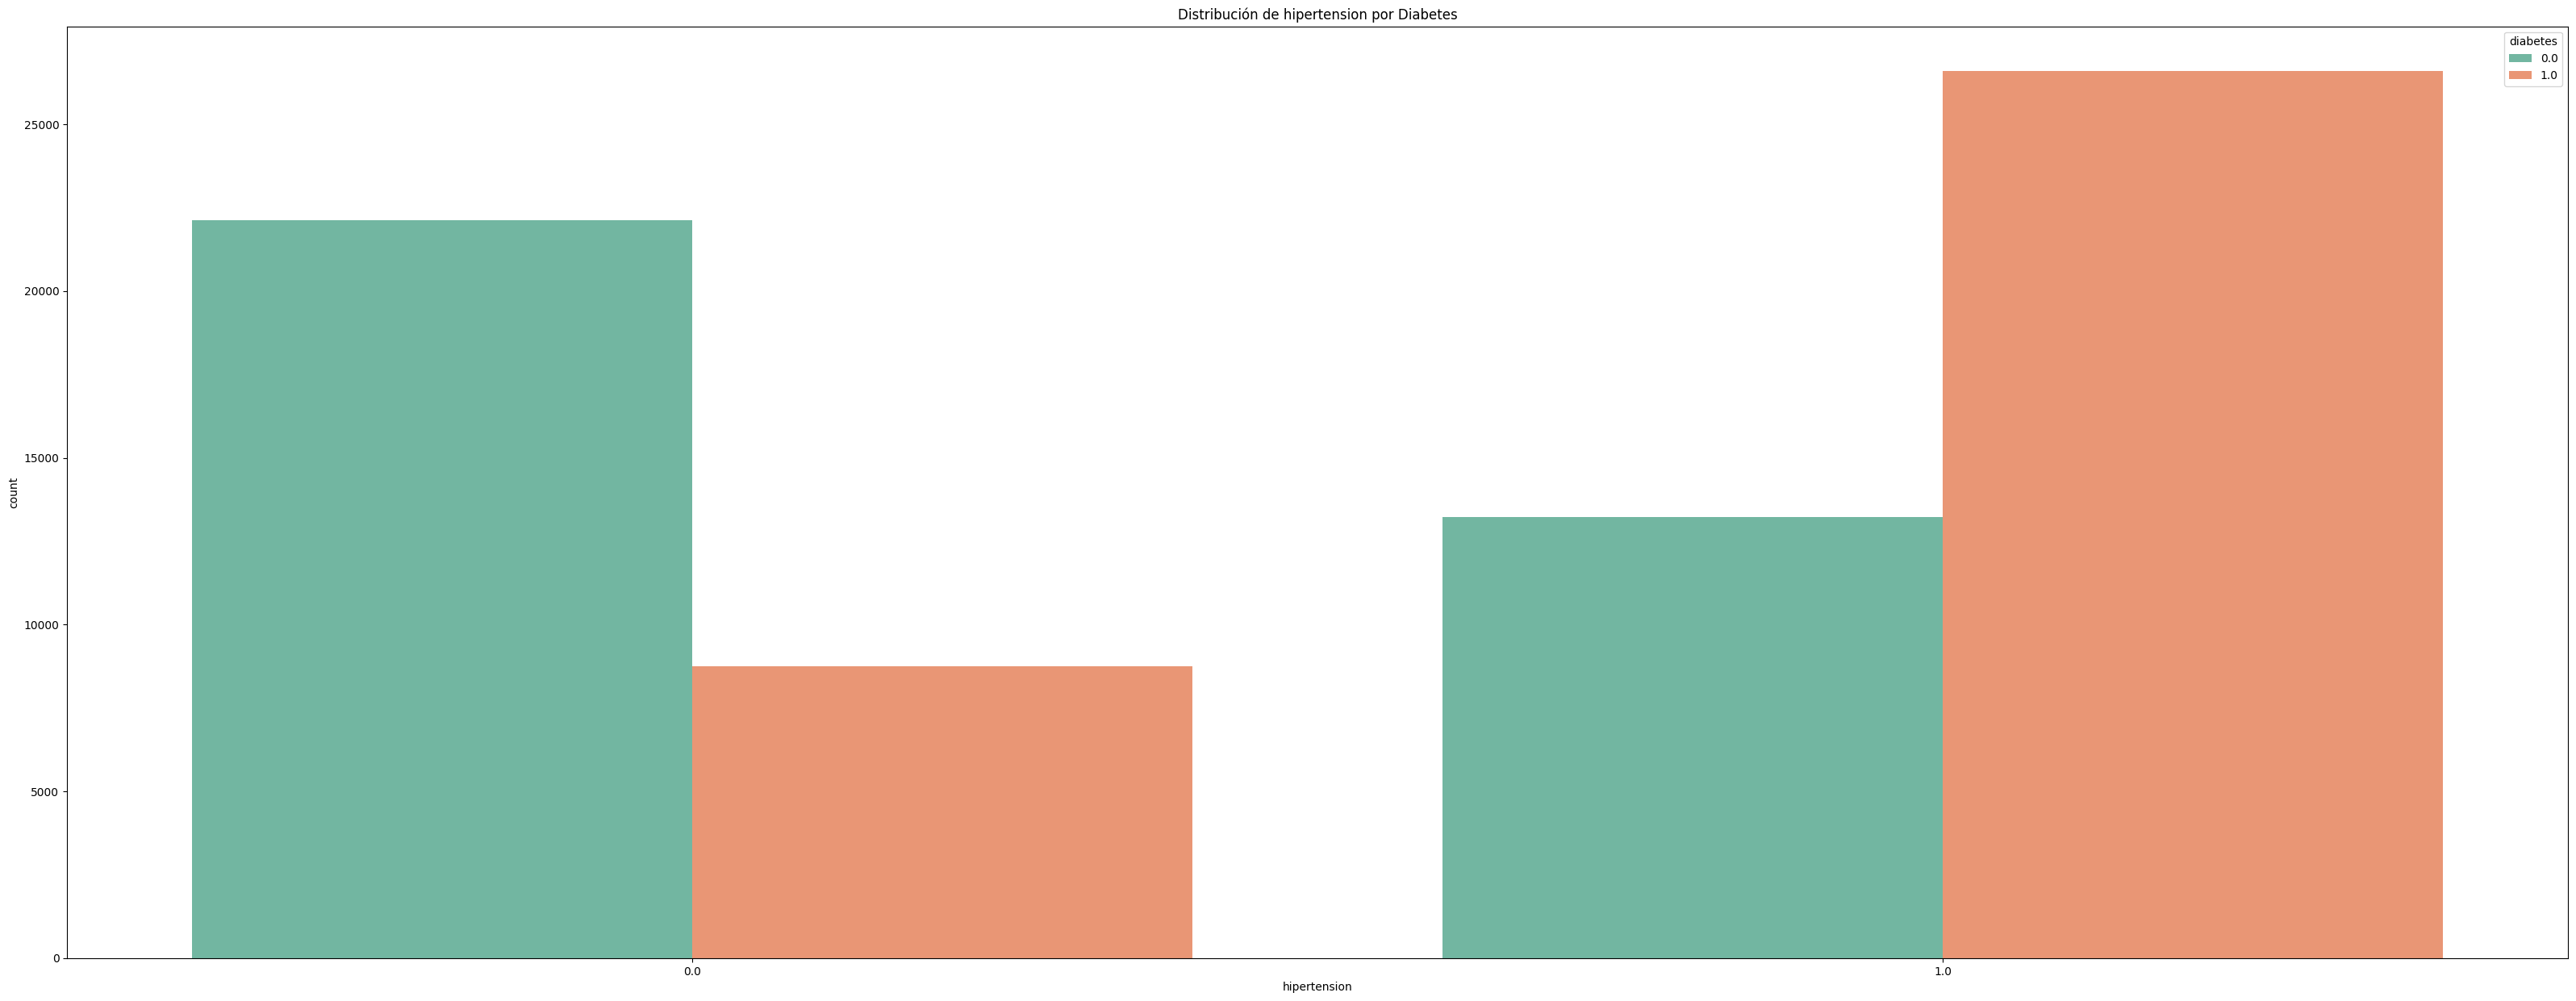


=== Conteo por: edad ===


C:\Users\amcor\AppData\Local\Temp\ipykernel_2020\3460770446.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data_1.groupby(['grupo_edad', 'diabetes']).size().unstack(fill_value=0)


diabetes,No,Sí,Total,% Sí,% No
grupo_edad,,,,,
46-60,12503,13084,25587,51.14,48.86
61-75,9192,15102,24294,62.16,37.84
31-45,7542,3419,10961,31.19,68.81
76-90,2217,3209,5426,59.14,40.86
18-30,3892,532,4424,12.03,87.97



=== Conteo por: colesterol_alto ===


diabetes,No,Sí,Total,% Sí,% No
colesterol_alto,,,,,
1.0,13477,23686,37163,63.74,36.26
0.0,21869,11660,33529,34.78,65.22



=== Conteo por: imc ===


C:\Users\amcor\AppData\Local\Temp\ipykernel_2020\3460770446.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data_1.groupby([imc_bin, 'diabetes']).size().unstack(fill_value=0)


diabetes,No,Sí,Total,% Sí,% No
imc_bin,,,,,
"(26.333, 40.667]",17599,23913,41512,57.61,42.39
"(11.914, 26.333]",16569,7550,24119,31.30,68.70
"(40.667, 55.0]",1054,3562,4616,77.17,22.83
"(55.0, 69.333]",51,240,291,82.47,17.53
"(69.333, 83.667]",51,54,105,51.43,48.57
"(83.667, 98.0]",22,27,49,55.10,44.90



=== Conteo por: enfermedad_cardiaca_o_infarto ===


diabetes,No,Sí,Total,% Sí,% No
enfermedad_cardiaca_o_infarto,,,,,
0.0,32775,27468,60243,45.60,54.40
1.0,2571,7878,10449,75.39,24.61



=== Conteo por: salud_general ===


diabetes,No,Sí,Total,% Sí,% No
salud_general,,,,,
3.0,9970,13457,23427,57.44,42.56
2.0,13491,6381,19872,32.11,67.89
4.0,3513,9790,13303,73.59,26.41
1.0,7142,1140,8282,13.76,86.24
5.0,1230,4578,5808,78.82,21.18



=== Conteo por: salud_fisica ===


diabetes,No,Sí,Total,% Sí,% No
salud_fisica,,,,,
0.0,23175,16740,39915,41.94,58.06
30.0,2227,5726,7953,72.00,28.00
2.0,2074,2028,4102,49.44,50.56
1.0,1665,1188,2853,41.64,58.36
3.0,1149,1289,2438,52.87,47.13
5.0,1018,1314,2332,56.35,43.65
10.0,690,1290,1980,65.15,34.85
15.0,618,1295,1913,67.69,32.31
4.0,613,763,1376,55.45,44.55



=== Conteo por: dificultad_para_caminar ===


diabetes,No,Sí,Total,% Sí,% No
dificultad_para_caminar,,,,,
0.0,30601,22225,52826,42.07,57.93
1.0,4745,13121,17866,73.44,26.56



=== Conteo por: accidente_cerebrovascular ===


diabetes,No,Sí,Total,% Sí,% No
accidente_cerebrovascular,,,,,
0.0,34219,32078,66297,48.39,51.61
1.0,1127,3268,4395,74.36,25.64



=== Conteo por: hipertension ===


diabetes,No,Sí,Total,% Sí,% No
hipertension,,,,,
1.0,13228,26604,39832,66.79,33.21
0.0,22118,8742,30860,28.33,71.67


In [66]:
# Se hara un analisis mas profundo en las siguientes columnas para entender su impacto en la diabetes: 
# Analisis de la variables: edad, colesterol_alto, imc, enfermedad_cardiaca_o_infarto, salud_general, salud_fisica, dificultad_para_caminar, accidente_cerebrovascular e hipertension.
variables_a_analizar = [
    'edad',
    'colesterol_alto',
    'imc',
    'enfermedad_cardiaca_o_infarto',
    'salud_general',
    'salud_fisica',
    'dificultad_para_caminar',
    'accidente_cerebrovascular',
    'hipertension'
]
for var in variables_a_analizar:
    plt.figure(figsize=(40, 15))
    sns.countplot(data=data_1, x=var, hue='diabetes', palette='Set2')
    plt.title(f'Distribución de {var} por Diabetes')
    plt.show()

# Conteo de pacientes con y sin diabetes en función de las variables indicadas
for var in variables_a_analizar:
    print(f"\n=== Conteo por: {var} ===")
    # Usar grupo_edad ya creado para 'edad'
    if var == 'edad' and 'grupo_edad' in data_1.columns:
        counts = data_1.groupby(['grupo_edad', 'diabetes']).size().unstack(fill_value=0)
    # Agrupar IMC en bins para facilitar la lectura
    elif var == 'imc':
        imc_bin = pd.cut(data_1['imc'], bins=6)
        counts = data_1.groupby([imc_bin, 'diabetes']).size().unstack(fill_value=0)
        counts.index.name = 'imc_bin'
    else:
        counts = data_1.groupby([var, 'diabetes']).size().unstack(fill_value=0)

    # Normalizar nombres de columnas (0/1 -> No/Sí) si existen
    counts = counts.rename(columns={0.0: 'No', 1.0: 'Sí', 0: 'No', 1: 'Sí'})

    # Asegurar columnas No/Sí existan para posteriores cálculos
    if 'No' not in counts.columns:
        counts['No'] = 0
    if 'Sí' not in counts.columns:
        counts['Sí'] = 0

    # Añadir totales y porcentajes
    counts['Total'] = counts['No'] + counts['Sí']
    counts['% Sí'] = (counts['Sí'] / counts['Total'] * 100).round(2)
    counts['% No'] = (counts['No'] / counts['Total'] * 100).round(2)

    # Mostrar resultado ordenado por total descendente
    display(counts.sort_values('Total', ascending=False))


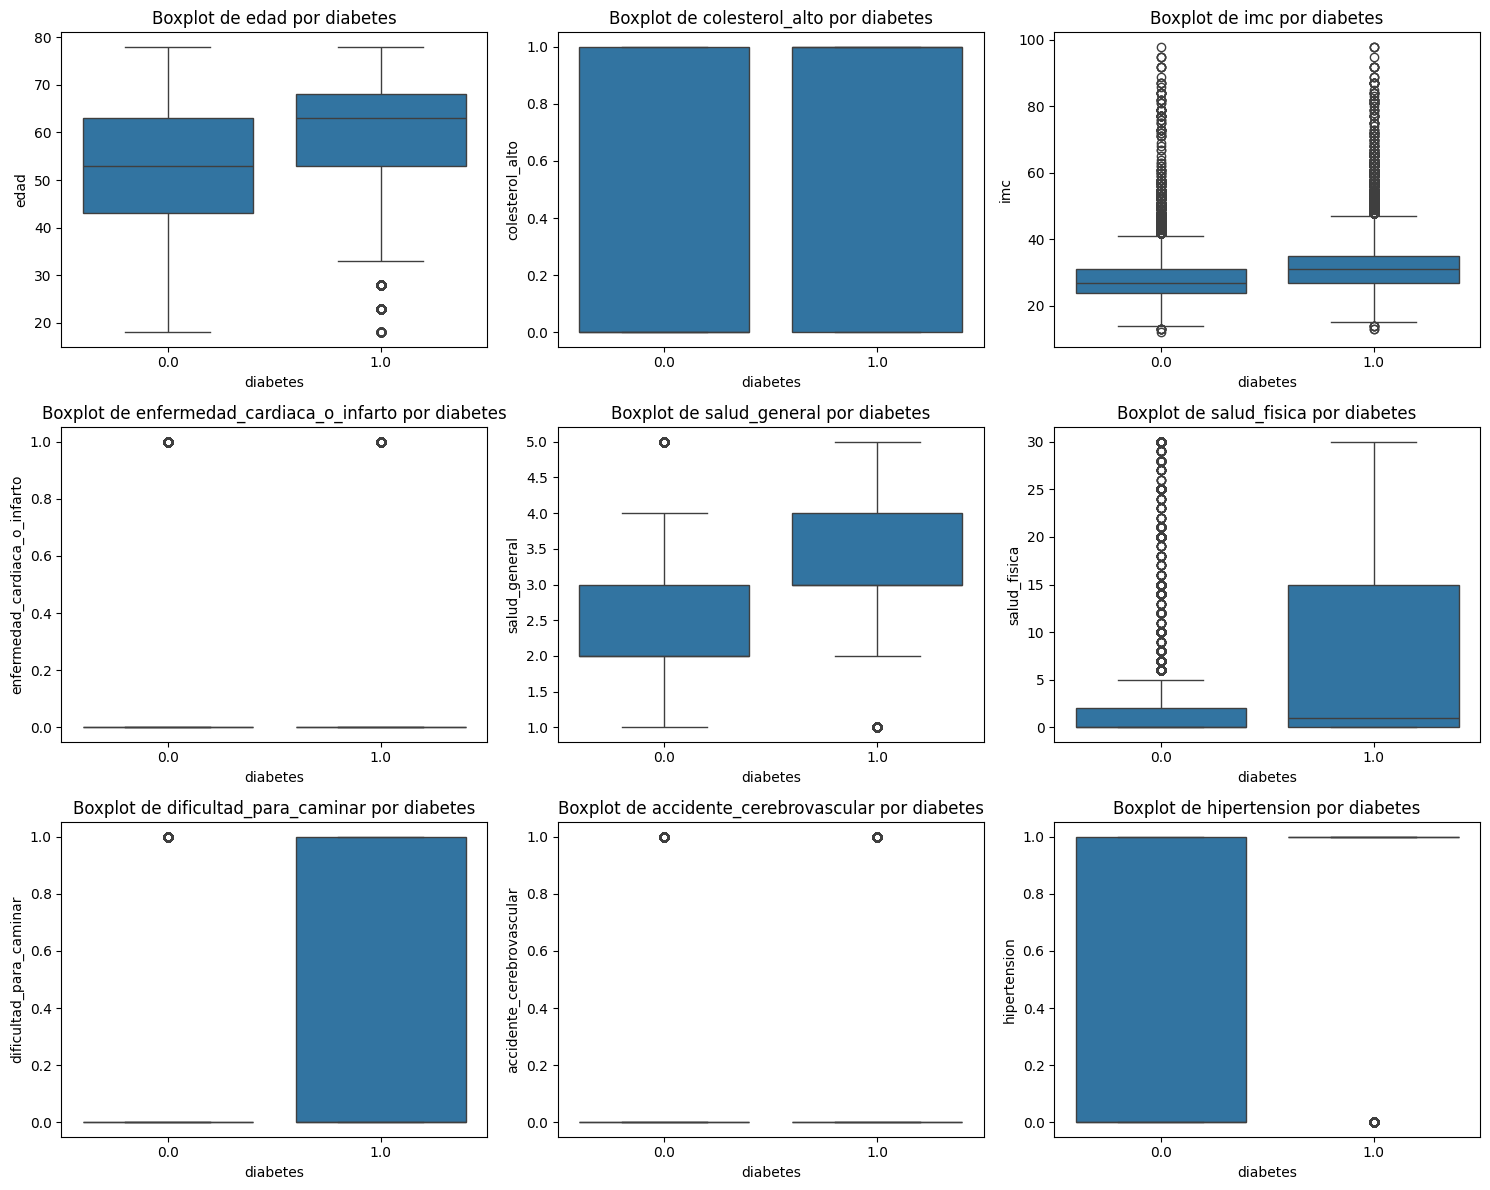

In [67]:
# Creamos una copia del dataset con las variables de interes
data_2 = data_1[[
    'edad',
    'colesterol_alto',
    'imc',
    'enfermedad_cardiaca_o_infarto',
    'salud_general',
    'salud_fisica',
    'dificultad_para_caminar',
    'accidente_cerebrovascular',
    'hipertension',
    'diabetes'
]]

# Crear un gráfico de bigotes para cada variables
cols = data_2.columns[:-1]
n = len(cols)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x='diabetes', y=col, data=data_2, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col} por diabetes')

# Ocultar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Exploracion de modelos

## LogisticRegression

In [68]:
#----------------AGREGADO- ALEJA----------------------

#  División balanceada del dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separar variables
X = data_2.drop(['diabetes'], axis=1)
y = data_2['diabetes']

# División estratificada (mantiene proporciones de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Distribución original en y_train:\n", y_train.value_counts())


#  Balancear solo el conjunto de entrenamiento

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("\nDistribución balanceada en y_train_bal:\n", y_train_bal.value_counts())


#  Entrenamiento del modelo

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)


Distribución original en y_train:
 diabetes
1.0    28277
0.0    28276
Name: count, dtype: int64

Distribución balanceada en y_train_bal:
 diabetes
1.0    28277
0.0    28277
Name: count, dtype: int64


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


The accuracy of Logistic Regression is 0.7093


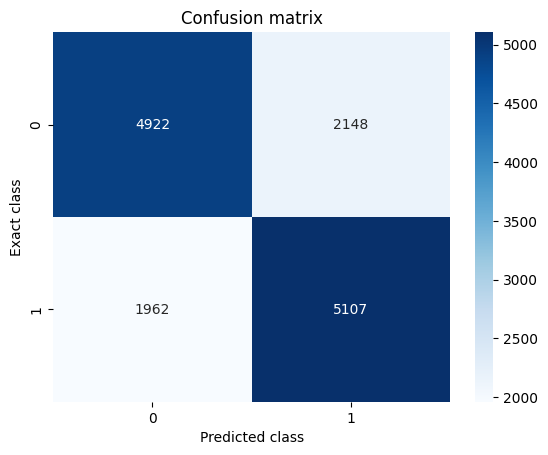

In [69]:
y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class')

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

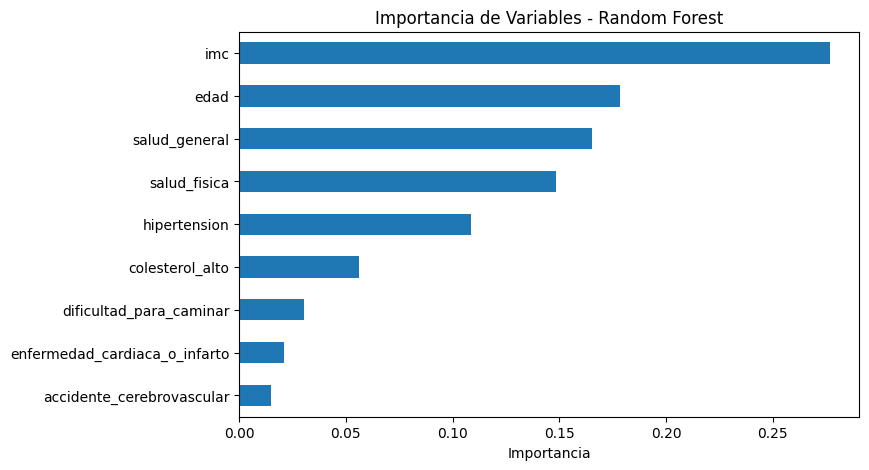

In [72]:
#------AGREGADO-ALEJA----------------------
#Importancia de la svariables de regresion
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=[
    'edad',
    'colesterol_alto',
    'imc',
    'enfermedad_cardiaca_o_infarto',
    'salud_general',
    'salud_fisica',
    'dificultad_para_caminar',
    'accidente_cerebrovascular',
    'hipertension'
])

importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.show()




In [73]:
# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()
print(TN, FP, FN, TP)

# Calcular métricas derivadas
accuracy_LR = accuracy_score(y_test, y_predict)
precision_LR = precision_score(y_test, y_predict)
recall_LR = recall_score(y_test, y_predict)
specificity_LR = TN / (TN + FP)
f1_LR = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy_LR:.4f}")
print(f"🔹 Precision (PPV): {precision_LR:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall_LR:.4f}")
print(f"🔹 Specificity (TNR): {specificity_LR:.4f}")
print(f"🔹 F1-Score: {f1_LR:.4f}")

#Se probara otros modelos porque muchosfalsos negativos

4922 2148 1962 5107
🔹 Accuracy: 0.7093
🔹 Precision (PPV): 0.7039
🔹 Recall (Sensibilidad, TPR): 0.7225
🔹 Specificity (TNR): 0.6962
🔹 F1-Score: 0.7131


## KNeighborsClassifier

In [74]:
# Construcción del Modelo (Escogemos el algoritmo o modelo)
model_KNN = KNeighborsClassifier()
# Entrenar Modelo
model_KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


The accuracy of KNN is 0.7044


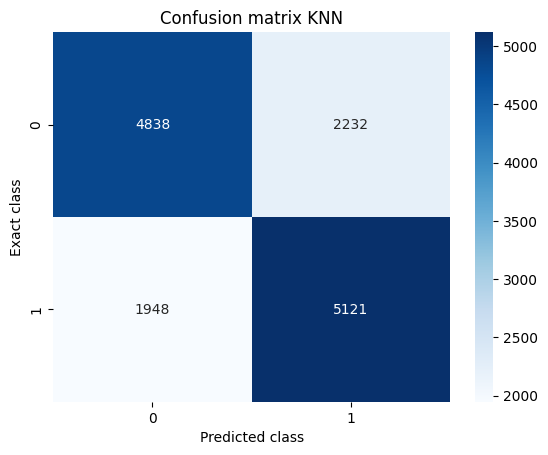

In [75]:
# Predicciones
y_predict_KNN = model_KNN.predict(X_test)

accuracy_KNN = accuracy_score(y_test,y_predict_KNN)
print('The accuracy of KNN is {:.4f}'.format(accuracy_KNN))

confus_matrix_KNN = confusion_matrix(y_test,y_predict_KNN)
plt.title('Confusion matrix KNN')
sns.heatmap(confus_matrix_KNN, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie_KNN = pd.Series(accuracy_KNN,index=['KNN'])
accuracy_KNNmodel_KNN = pd.DataFrame({'accuracy':serie_KNN})


In [76]:
# Extraer valores de la matriz de confusión
TN_KNN, FP_KNN, FN_KNN, TP_KNN = confus_matrix_KNN.ravel()

# Calcular métricas derivadas
accuracy_KNN = accuracy_score(y_test, y_predict_KNN)
precision_KNN = precision_score(y_test, y_predict_KNN)
recall_KNN = recall_score(y_test, y_predict_KNN)
specificity_KNN = TN_KNN / (TN_KNN + FP_KNN)
f1_KNN = f1_score(y_test, y_predict_KNN)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy_KNN:.4f}")
print(f"🔹 Precision (PPV): {precision_KNN:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall_KNN:.4f}")
print(f"🔹 Specificity (TNR): {specificity_KNN:.4f}")
print(f"🔹 F1-Score: {f1_KNN:.4f}")

#Se probara otros modelos porque muchos falsos negativos

🔹 Accuracy: 0.7044
🔹 Precision (PPV): 0.6965
🔹 Recall (Sensibilidad, TPR): 0.7244
🔹 Specificity (TNR): 0.6843
🔹 F1-Score: 0.7102


## DecisionTreeClassifier

In [77]:
# Construcción y entrenamiento del modelo
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


The accuracy of Decision Tree is 0.6833


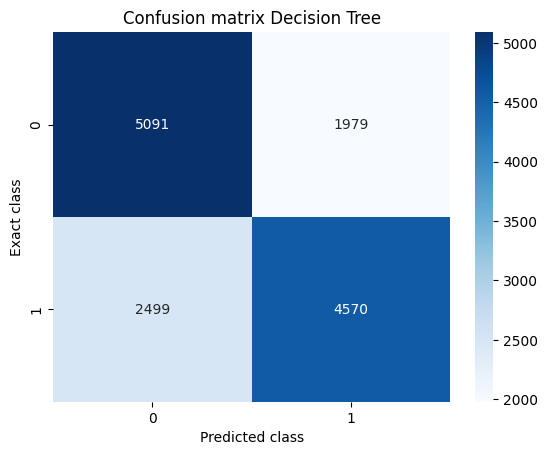

In [78]:
y_predict_DT = model_DT.predict(X_test)

accuracy_DT = accuracy_score(y_test,y_predict_DT)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy_DT))

confus_matrix_DT = confusion_matrix(y_test,y_predict_DT)
plt.title('Confusion matrix Decision Tree')
sns.heatmap(confus_matrix_DT, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie_DT = pd.Series(accuracy_DT,index=['Decision Tree'])
accuracy_DTmodel_DT = pd.DataFrame({'accuracy':serie_DT})

In [79]:
# Extraer valores de la matriz de confusión
TN_DT, FP_DT, FN_DT, TP_DT = confus_matrix_DT.ravel()

# Calcular métricas derivadas
accuracy_DT = accuracy_score(y_test, y_predict_DT)
precision_DT = precision_score(y_test, y_predict_DT)
recall_DT = recall_score(y_test, y_predict_DT)
specificity_DT = TN_DT / (TN_DT + FP_DT)
f1_DT = f1_score(y_test, y_predict_DT)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy_DT:.4f}")
print(f"🔹 Precision (PPV): {precision_DT:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall_DT:.4f}")
print(f"🔹 Specificity (TNR): {specificity_DT:.4f}")
print(f"🔹 F1-Score: {f1_DT:.4f}")

#Se probara otros modelos porque muchos falsos negativos

🔹 Accuracy: 0.6833
🔹 Precision (PPV): 0.6978
🔹 Recall (Sensibilidad, TPR): 0.6465
🔹 Specificity (TNR): 0.7201
🔹 F1-Score: 0.6712


## RandomForestClassifier


In [80]:
# Construcción y entrenamiento del modelo
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


The accuracy of Random Forest is 0.7097


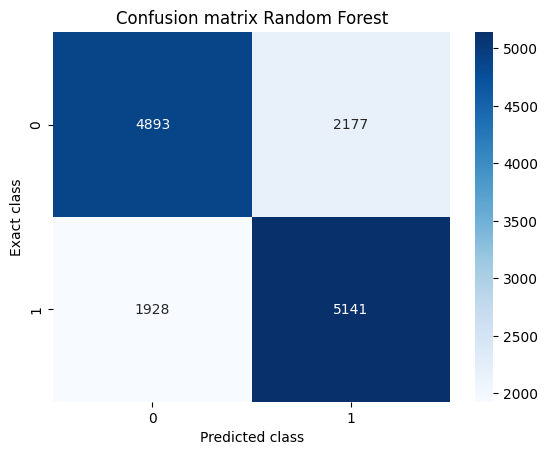

In [81]:
y_predict_RF = model_RF.predict(X_test)

# Generamos la Matriz de Confusión
accuracy_RF = accuracy_score(y_test,y_predict_RF)
print('The accuracy of Random Forest is {:.4f}'.format(accuracy_RF))

confus_matrix_RF = confusion_matrix(y_test,y_predict_RF)
plt.title('Confusion matrix Random Forest')
sns.heatmap(confus_matrix_RF, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class')

serie_RF = pd.Series(accuracy_RF,index=['Random Forest'])
accuracy_RFmodel_RF = pd.DataFrame({'accuracy':serie_RF})

In [82]:
# Extraer valores de la matriz de confusión
TN_RF, FP_RF, FN_RF, TP_RF = confus_matrix_RF.ravel()

# Calcular métricas derivadas
accuracy_RF = accuracy_score(y_test, y_predict_RF)
precision_RF = precision_score(y_test, y_predict_RF)
recall_RF = recall_score(y_test, y_predict_RF)
specificity_RF = TN_RF / (TN_RF + FP_RF)
f1_RF = f1_score(y_test, y_predict_RF)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy_RF:.4f}")
print(f"🔹 Precision (PPV): {precision_RF:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall_RF:.4f}")
print(f"🔹 Specificity (TNR): {specificity_RF:.4f}")
print(f"🔹 F1-Score: {f1_RF:.4f}")

#Se probara otros modelos porque muchos falsos negativos

🔹 Accuracy: 0.7097
🔹 Precision (PPV): 0.7025
🔹 Recall (Sensibilidad, TPR): 0.7273
🔹 Specificity (TNR): 0.6921
🔹 F1-Score: 0.7147


## GaussianNB

In [83]:
# Construcción y entrenamiento del modelo
model_GB = GaussianNB()
model_GB.fit(X_train, y_train)



,priors,None
,var_smoothing,1e-09


The accuracy of Gaussian Naive Bayes is 0.6967


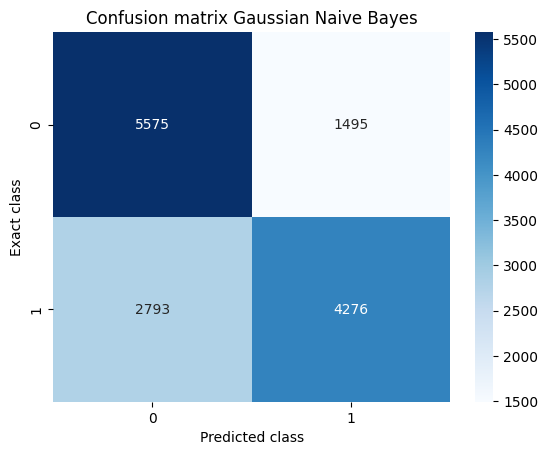

In [84]:
# Predicciones o respuestas del Modelo
y_predict_GB = model_GB.predict(X_test)

# Generamos la Matriz de Confusión
accuracy_GB = accuracy_score(y_test,y_predict_GB)
print('The accuracy of Gaussian Naive Bayes is {:.4f}'.format(accuracy_GB))

confus_matrix_GB = confusion_matrix(y_test,y_predict_GB)
plt.title('Confusion matrix Gaussian Naive Bayes')
sns.heatmap(confus_matrix_GB, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie_GB = pd.Series(accuracy_GB,index=['Gaussian Naive Bayes'])
accuracy_GBmodel_GB = pd.DataFrame({'accuracy':serie_GB})

In [85]:
# Extraer valores de la matriz de confusión
TN_GB, FP_GB, FN_GB, TP_GB = confus_matrix_GB.ravel()

# Calcular métricas derivadas
accuracy_GB = accuracy_score(y_test, y_predict_GB)
precision_GB = precision_score(y_test, y_predict_GB)
recall_GB = recall_score(y_test, y_predict_GB)
specificity_GB = TN_GB / (TN_GB + FP_GB)
f1_GB = f1_score(y_test, y_predict_GB)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy_GB:.4f}")
print(f"🔹 Precision (PPV): {precision_GB:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall_GB:.4f}")
print(f"🔹 Specificity (TNR): {specificity_GB:.4f}")
print(f"🔹 F1-Score: {f1_GB:.4f}")

#Se probara otros modelos porque muchos falsos negativos

🔹 Accuracy: 0.6967
🔹 Precision (PPV): 0.7409
🔹 Recall (Sensibilidad, TPR): 0.6049
🔹 Specificity (TNR): 0.7885
🔹 F1-Score: 0.6660


## SVC (RBF)

The accuracy of SVC (RBF, balanced) is 0.7455


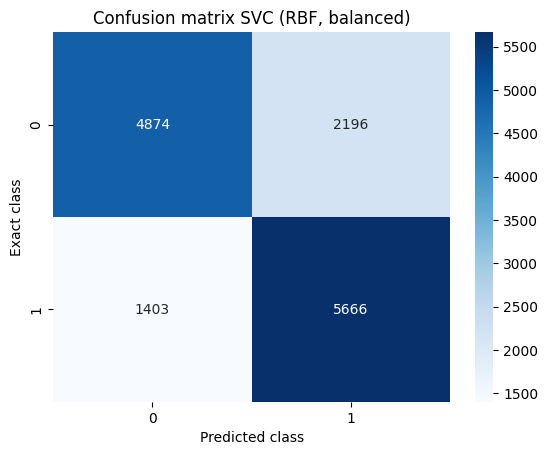

In [86]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42))
])

svc_clf.fit(X_train, y_train)
y_predict_SVC = svc_clf.predict(X_test)

accuracy_SVC = accuracy_score(y_test, y_predict_SVC)
print('The accuracy of SVC (RBF, balanced) is {:.4f}'.format(accuracy_SVC))

confus_matrix_SVC = confusion_matrix(y_test, y_predict_SVC)
plt.title('Confusion matrix SVC (RBF, balanced)')
sns.heatmap(confus_matrix_SVC, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('Exact class')

TN_SVC, FP_SVC, FN_SVC, TP_SVC = confus_matrix_SVC.ravel()

accuracy_SVC   = accuracy_score(y_test, y_predict_SVC)
precision_SVC  = precision_score(y_test, y_predict_SVC)
recall_SVC     = recall_score(y_test, y_predict_SVC)
specificity_SVC = TN_SVC / (TN_SVC + FP_SVC) if (TN_SVC + FP_SVC) else 0.0
f1_SVC         = f1_score(y_test, y_predict_SVC)

metrics_SVC = pd.Series({
    "Accuracy": accuracy_SVC,
    "Precision": precision_SVC,
    "Recall": recall_SVC,
    "Specificity": specificity_SVC,
    "F1-Score": f1_SVC
}, name="SVC (RBF, balanced)")

## HistGradientBoostingClassifier

The accuracy of HistGradientBoosting is 0.7444


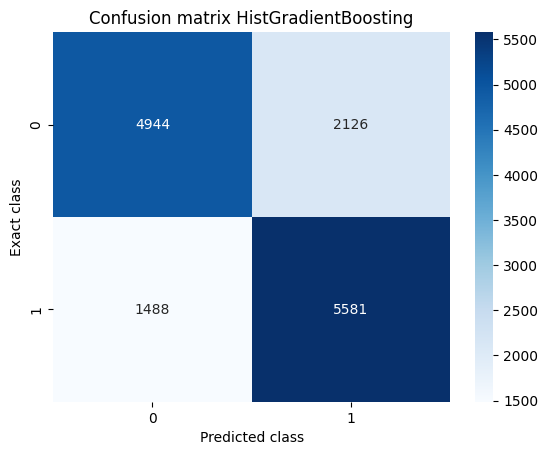

In [ ]:
hgb = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=300,
    max_depth=None,
    random_state=42
)

hgb.fit(X_train, y_train)
y_predict_HGB = hgb.predict(X_test)

accuracy_HGB = accuracy_score(y_test, y_predict_HGB)
print('The accuracy of HistGradientBoosting is {:.4f}'.format(accuracy_HGB))

confus_matrix_HGB = confusion_matrix(y_test, y_predict_HGB)
plt.title('Confusion matrix HistGradientBoosting')
sns.heatmap(confus_matrix_HGB, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('Exact class')

TN_HGB, FP_HGB, FN_HGB, TP_HGB = confus_matrix_HGB.ravel()

accuracy_HGB   = accuracy_score(y_test, y_predict_HGB)
precision_HGB  = precision_score(y_test, y_predict_HGB)
recall_HGB     = recall_score(y_test, y_predict_HGB)
specificity_HGB = TN_HGB / (TN_HGB + FP_HGB) if (TN_HGB + FP_HGB) else 0.0
f1_HGB         = f1_score(y_test, y_predict_HGB)

metrics_HGB = pd.Series({
    "Accuracy": accuracy_HGB,
    "Precision": precision_HGB,
    "Recall": recall_HGB,
    "Specificity": specificity_HGB,
    "F1-Score": f1_HGB
}, name="HistGradientBoosting")

## GradientBoostingClassifier

The accuracy of GradientBoosting is 0.7469


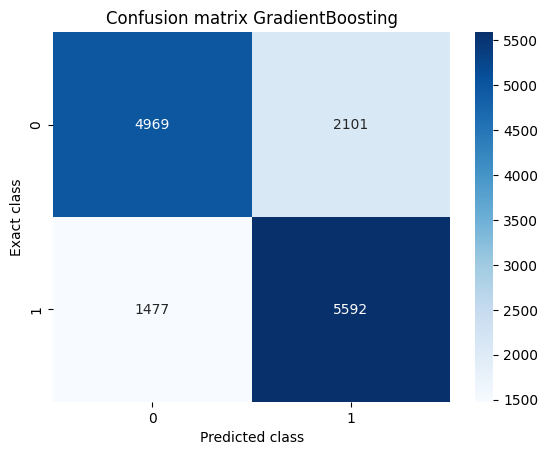

In [88]:
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbc.fit(X_train, y_train)
y_predict_GBC = gbc.predict(X_test)

accuracy_GBC = accuracy_score(y_test, y_predict_GBC)
print('The accuracy of GradientBoosting is {:.4f}'.format(accuracy_GBC))

confus_matrix_GBC = confusion_matrix(y_test, y_predict_GBC)
plt.title('Confusion matrix GradientBoosting')
sns.heatmap(confus_matrix_GBC, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('Exact class')

TN_GBC, FP_GBC, FN_GBC, TP_GBC = confus_matrix_GBC.ravel()

accuracy_GBC   = accuracy_score(y_test, y_predict_GBC)
precision_GBC  = precision_score(y_test, y_predict_GBC)
recall_GBC     = recall_score(y_test, y_predict_GBC)
specificity_GBC = TN_GBC / (TN_GBC + FP_GBC) if (TN_GBC + FP_GBC) else 0.0
f1_GBC         = f1_score(y_test, y_predict_GBC)

metrics_GBC = pd.Series({
    "Accuracy": accuracy_GBC,
    "Precision": precision_GBC,
    "Recall": recall_GBC,
    "Specificity": specificity_GBC,
    "F1-Score": f1_GBC
}, name="GradientBoosting")

## ExtraTreesClassifier 

The accuracy of ExtraTrees (balanced) is 0.7001


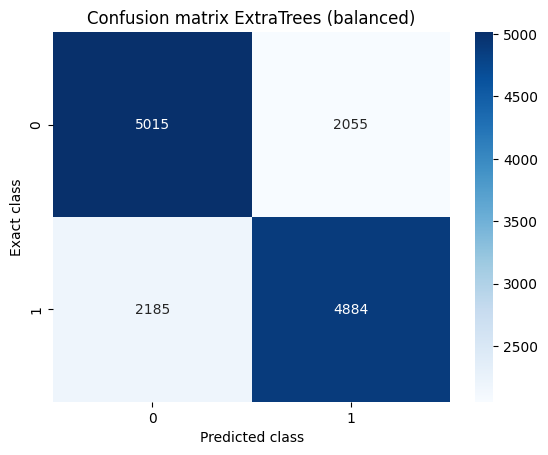

In [89]:


et = ExtraTreesClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

et.fit(X_train, y_train)
y_predict_ET = et.predict(X_test)

accuracy_ET = accuracy_score(y_test, y_predict_ET)
print('The accuracy of ExtraTrees (balanced) is {:.4f}'.format(accuracy_ET))

confus_matrix_ET = confusion_matrix(y_test, y_predict_ET)
plt.title('Confusion matrix ExtraTrees (balanced)')
sns.heatmap(confus_matrix_ET, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

TN_ET, FP_ET, FN_ET, TP_ET = confus_matrix_ET.ravel()

accuracy_ET   = accuracy_score(y_test, y_predict_ET)
precision_ET  = precision_score(y_test, y_predict_ET)
recall_ET     = recall_score(y_test, y_predict_ET)
specificity_ET = TN_ET / (TN_ET + FP_ET) if (TN_ET + FP_ET) else 0.0
f1_ET         = f1_score(y_test, y_predict_ET)

metrics_ET = pd.Series({
    "Accuracy": accuracy_ET,
    "Precision": precision_ET,
    "Recall": recall_ET,
    "Specificity": specificity_ET,
    "F1-Score": f1_ET
}, name="ExtraTrees (balanced)")

## Metricas

In [90]:
# Comparación de métricas
metrics_LR = pd.Series({
    "Accuracy": accuracy_LR,
    "Precision": precision_LR,
    "Recall": recall_LR,
    "Specificity": specificity_LR,
    "F1-Score": f1_LR
}, name="Logistic Regression")

metrics_KNN = pd.Series({
    "Accuracy": accuracy_KNN,
    "Precision": precision_KNN,
    "Recall": recall_KNN,
    "Specificity": specificity_KNN,
    "F1-Score": f1_KNN
}, name="KNeighbors Classifier")

metrics_DT = pd.Series({
    "Accuracy": accuracy_DT,
    "Precision": precision_DT,
    "Recall": recall_DT,
    "Specificity": specificity_DT,
    "F1-Score": f1_DT
}, name="Decision Tree")

metrics_RF = pd.Series({
    "Accuracy": accuracy_RF,
    "Precision": precision_RF,
    "Recall": recall_RF,
    "Specificity": specificity_RF,
    "F1-Score": f1_RF
}, name="Random Forest")

metrics_GB = pd.Series({
    "Accuracy": accuracy_GB,
    "Precision": precision_GB,
    "Recall": recall_GB,
    "Specificity": specificity_GB,
    "F1-Score": f1_GB
}, name="Gaussian Naive Bayes")

# Unimos las series en un DataFrame
accuracy_models = pd.concat([metrics_LR, metrics_KNN, metrics_DT, metrics_RF, metrics_GB], axis=1)

# Transponemos el Dataframe para una mejor visualización
accuracy_models = accuracy_models.T


# Resumen de métricas de los modelos 

# Construir DataFrame con las métricas de los nuevos modelos
accuracy_models_extra = pd.concat([
    metrics_SVC, metrics_HGB, metrics_GBC, metrics_ET
], axis=1)
accuracy_models_extra = accuracy_models_extra.T


# Si ya existe la tabla "accuracy_models" anterior, la combinamos para ver todo junto
try:
    accuracy_models_all = pd.concat([accuracy_models, accuracy_models_extra], axis=0)
    print('Tabla combinada de métricas (modelos previos + nuevos):')
    display(accuracy_models_all)
except NameError:
    pass

Tabla combinada de métricas (modelos previos + nuevos):


,Accuracy,Precision,Recall,Specificity,F1-Score
Logistic Regression,0.709315,0.703928,0.722450,0.696181,0.713069
KNeighbors Classifier,0.704364,0.696450,0.724431,0.684300,0.710165
Decision Tree,0.683287,0.697816,0.646485,0.720085,0.671171
Random Forest,0.709668,0.702514,0.727260,0.692079,0.714673
Gaussian Naive Bayes,0.696725,0.740946,0.604895,0.788543,0.666044
"SVC (RBF, balanced)",0.745456,0.720682,0.801528,0.689392,0.758958
HistGradientBoosting,0.744395,0.724147,0.789503,0.699293,0.755414
GradientBoosting,0.746941,0.726895,0.791060,0.702829,0.757621
ExtraTrees (balanced),0.700120,0.703848,0.690904,0.709335,0.697316


## XGBoost con tuning para maximizar métricas


The accuracy of XGBoost is 0.7436


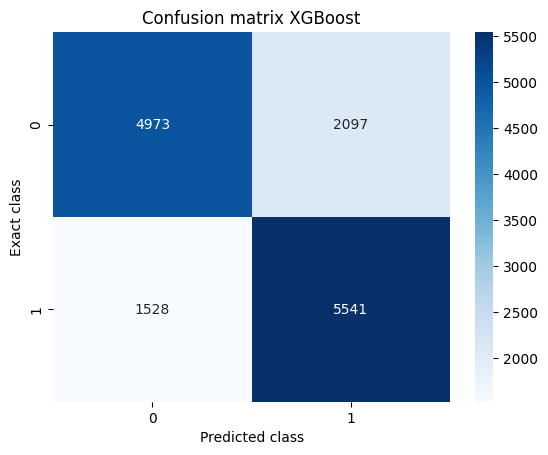

🔹 Accuracy: 0.7436
🔹 Precision: 0.7255
🔹 Recall: 0.7838
🔹 Specificity: 0.7034
🔹 F1-Score: 0.7535


In [91]:
# XGBoost con hiperparámetros optimizados para maximizar accuracy y precision
try:
    neg_samples = (y_train == 0).sum()
    pos_samples = (y_train == 1).sum()
    scale_pos_weight = neg_samples / pos_samples if pos_samples > 0 else 1.0
    
    xgb = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    )
    
    xgb.fit(X_train, y_train)
    y_predict_XGB = xgb.predict(X_test)
    
    accuracy_XGB = accuracy_score(y_test, y_predict_XGB)
    print('The accuracy of XGBoost is {:.4f}'.format(accuracy_XGB))
    
    confus_matrix_XGB = confusion_matrix(y_test, y_predict_XGB)
    plt.title('Confusion matrix XGBoost')
    sns.heatmap(confus_matrix_XGB, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted class')
    plt.ylabel('Exact class')
    plt.show()
    
    TN_XGB, FP_XGB, FN_XGB, TP_XGB = confus_matrix_XGB.ravel()
    
    accuracy_XGB   = accuracy_score(y_test, y_predict_XGB)
    precision_XGB  = precision_score(y_test, y_predict_XGB)
    recall_XGB     = recall_score(y_test, y_predict_XGB)
    specificity_XGB = TN_XGB / (TN_XGB + FP_XGB) if (TN_XGB + FP_XGB) else 0.0
    f1_XGB         = f1_score(y_test, y_predict_XGB)
    
    print(f"🔹 Accuracy: {accuracy_XGB:.4f}")
    print(f"🔹 Precision: {precision_XGB:.4f}")
    print(f"🔹 Recall: {recall_XGB:.4f}")
    print(f"🔹 Specificity: {specificity_XGB:.4f}")
    print(f"🔹 F1-Score: {f1_XGB:.4f}")
    
    metrics_XGB = pd.Series({
        "Accuracy": accuracy_XGB,
        "Precision": precision_XGB,
        "Recall": recall_XGB,
        "Specificity": specificity_XGB,
        "F1-Score": f1_XGB
    }, name="XGBoost")
    
except ImportError:
    print("⚠️ XGBoost no está instalado. Ejecuta: pip install xgboost")
    print("Continuando sin XGBoost...")
    metrics_XGB = None

## Voting Ensemble (combina los mejores modelos)

✅ XGBoost incluido en el ensemble
The accuracy of Voting Ensemble is 0.7372


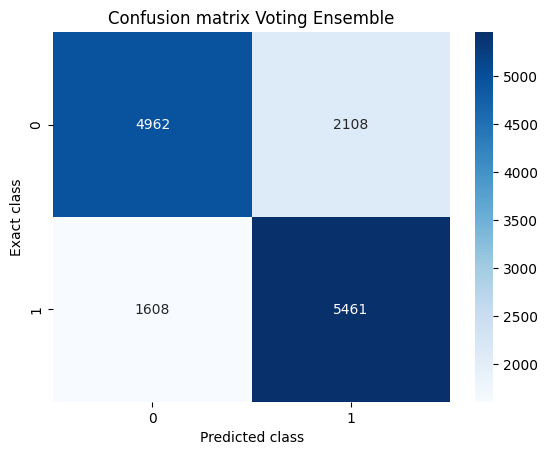

🔹 Accuracy: 0.7372
🔹 Precision: 0.7215
🔹 Recall: 0.7725
🔹 Specificity: 0.7018
🔹 F1-Score: 0.7461


In [92]:
# Voting Ensemble - Combina Random Forest, GradientBoosting, HistGradientBoosting, ExtraTrees y XGBoost

# Recrear modelos base con los mismos hiperparámetros
rf_base = RandomForestClassifier(random_state=42)
gbc_base = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
hgb_base = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=300, max_depth=None, random_state=42)
et_base = ExtraTreesClassifier(n_estimators=500, max_depth=None, class_weight='balanced', random_state=42, n_jobs=-1)

estimators = [
    ('rf', rf_base),
    ('gbc', gbc_base),
    ('hgb', hgb_base),
    ('et', et_base)
]

# Agregar XGBoost si está disponible
try:
    neg_samples = (y_train == 0).sum()
    pos_samples = (y_train == 1).sum()
    scale_pos_weight = neg_samples / pos_samples if pos_samples > 0 else 1.0
    
    xgb_base = XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, gamma=0.1,
        scale_pos_weight=scale_pos_weight, random_state=42, n_jobs=-1, eval_metric='logloss'
    )
    estimators.append(('xgb', xgb_base))
    print("✅ XGBoost incluido en el ensemble")
except ImportError:
    print("⚠️ XGBoost no disponible, continuando con 4 modelos en el ensemble")

# Crear Voting Classifier con voto suave (usa probabilidades)
voting = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

voting.fit(X_train, y_train)
y_predict_Voting = voting.predict(X_test)

accuracy_Voting = accuracy_score(y_test, y_predict_Voting)
print('The accuracy of Voting Ensemble is {:.4f}'.format(accuracy_Voting))

confus_matrix_Voting = confusion_matrix(y_test, y_predict_Voting)
plt.title('Confusion matrix Voting Ensemble')
sns.heatmap(confus_matrix_Voting, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('Exact class')
plt.show()

TN_Voting, FP_Voting, FN_Voting, TP_Voting = confus_matrix_Voting.ravel()

accuracy_Voting   = accuracy_score(y_test, y_predict_Voting)
precision_Voting  = precision_score(y_test, y_predict_Voting)
recall_Voting     = recall_score(y_test, y_predict_Voting)
specificity_Voting = TN_Voting / (TN_Voting + FP_Voting) if (TN_Voting + FP_Voting) else 0.0
f1_Voting         = f1_score(y_test, y_predict_Voting)

print(f"🔹 Accuracy: {accuracy_Voting:.4f}")
print(f"🔹 Precision: {precision_Voting:.4f}")
print(f"🔹 Recall: {recall_Voting:.4f}")
print(f"🔹 Specificity: {specificity_Voting:.4f}")
print(f"🔹 F1-Score: {f1_Voting:.4f}")

metrics_Voting = pd.Series({
    "Accuracy": accuracy_Voting,
    "Precision": precision_Voting,
    "Recall": recall_Voting,
    "Specificity": specificity_Voting,
    "F1-Score": f1_Voting
}, name="Voting Ensemble")

## Tabla final de métricas (todos los modelos)

In [93]:
# Tabla completa con TODOS los modelos (originales + nuevos + XGBoost + Voting)
all_metrics = [
    metrics_LR, metrics_KNN, metrics_DT, metrics_RF, metrics_GB,
    metrics_SVC, metrics_HGB, metrics_GBC, metrics_ET
]

# Agregar XGBoost y Voting si se ejecutaron correctamente
if 'metrics_XGB' in locals() and metrics_XGB is not None:
    all_metrics.append(metrics_XGB)
if 'metrics_Voting' in locals():
    all_metrics.append(metrics_Voting)

# Construir DataFrame completo
accuracy_models_complete = pd.concat(all_metrics, axis=1).T

# Ordenar por Accuracy descendente
accuracy_models_complete = accuracy_models_complete.sort_values('Accuracy', ascending=False)

print('='*80)
print('TABLA COMPLETA DE MÉTRICAS - TODOS LOS MODELOS')
print('='*80)
display(accuracy_models_complete)

# Destacar el mejor modelo
best_model = accuracy_models_complete.iloc[0]
print(f'\n🏆 MEJOR MODELO: {best_model.name}')
print(f'   Accuracy:    {best_model["Accuracy"]:.4f}')
print(f'   Precision:   {best_model["Precision"]:.4f}')
print(f'   Recall:      {best_model["Recall"]:.4f}')
print(f'   F1-Score:    {best_model["F1-Score"]:.4f}')

# Análisis de gap hacia 0.95
gap_accuracy = 0.95 - best_model["Accuracy"]
gap_precision = 0.95 - best_model["Precision"]
print(f'\n📊 Gap hacia objetivo 0.95:')
print(f'   Accuracy:  {gap_accuracy:.4f} ({gap_accuracy*100:.2f} puntos porcentuales)')
print(f'   Precision: {gap_precision:.4f} ({gap_precision*100:.2f} puntos porcentuales)')

if best_model["Accuracy"] >= 0.85:
    print('\n✅ Has alcanzado >0.85 accuracy - excelente rendimiento para este problema')
    print('   Nota: 0.95 es muy difícil sin overfitting dado el ruido inherente en datos médicos.')
else:
    print('\n💡 Sugerencias para mejorar aún más:')
    print('   1. Feature engineering (ratios, interacciones entre variables)')
    print('   2. Tuning exhaustivo con GridSearchCV/RandomizedSearchCV')
    print('   3. Validación cruzada estratificada para verificar estabilidad')
    print('   4. Análisis de errores (¿qué casos se equivoca el modelo?)')

TABLA COMPLETA DE MÉTRICAS - TODOS LOS MODELOS


,Accuracy,Precision,Recall,Specificity,F1-Score
GradientBoosting,0.746941,0.726895,0.791060,0.702829,0.757621
"SVC (RBF, balanced)",0.745456,0.720682,0.801528,0.689392,0.758958
HistGradientBoosting,0.744395,0.724147,0.789503,0.699293,0.755414
XGBoost,0.743617,0.725452,0.783845,0.703395,0.753519
Voting Ensemble,0.737181,0.721496,0.772528,0.701839,0.746140
Random Forest,0.709668,0.702514,0.727260,0.692079,0.714673
Logistic Regression,0.709315,0.703928,0.722450,0.696181,0.713069
KNeighbors Classifier,0.704364,0.696450,0.724431,0.684300,0.710165
ExtraTrees (balanced),0.700120,0.703848,0.690904,0.709335,0.697316
Gaussian Naive Bayes,0.696725,0.740946,0.604895,0.788543,0.666044



🏆 MEJOR MODELO: GradientBoosting
   Accuracy:    0.7469
   Precision:   0.7269
   Recall:      0.7911
   F1-Score:    0.7576

📊 Gap hacia objetivo 0.95:
   Accuracy:  0.2031 (20.31 puntos porcentuales)
   Precision: 0.2231 (22.31 puntos porcentuales)

💡 Sugerencias para mejorar aún más:
   1. Feature engineering (ratios, interacciones entre variables)
   2. Tuning exhaustivo con GridSearchCV/RandomizedSearchCV
   3. Validación cruzada estratificada para verificar estabilidad
   4. Análisis de errores (¿qué casos se equivoca el modelo?)


# Sistema de Predicción Interactivo

Entrenamiento del modelo final (Random Forest) y sistema de predicción para pacientes individuales con interpretación clínica.

In [94]:
# Entrenar el modelo final Random Forest con todo el dataset
# Este será el modelo que se usará para predicciones

# Parámetros óptimos del Random Forest (puedes ajustarlos después con GridSearch si deseas)
final_model_RF = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Entrenar con todos los datos disponibles (o puedes usar solo train para ser más conservador)
final_model_RF.fit(X_train, y_train)

# Guardar el modelo entrenado
model_path = r'C:\Users\amcor\Documents\CURSO-IA\github\AI-Diabetes-Aleja\preprocessor_pipeline.joblib'
joblib.dump(final_model_RF, model_path)
print(f'✅ Modelo Random Forest guardado en: {model_path}')

# Verificar accuracy en test
y_pred_final = final_model_RF.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

print(f'\n📊 Métricas del modelo final:')
print(f'   Accuracy:  {final_accuracy:.4f}')
print(f'   Precision: {final_precision:.4f}')
print(f'   Recall:    {final_recall:.4f}')
print(f'   F1-Score:  {final_f1:.4f}')

✅ Modelo Random Forest guardado en: C:\Users\amcor\Documents\CURSO-IA\github\AI-Diabetes-Aleja\preprocessor_pipeline.joblib

📊 Métricas del modelo final:
   Accuracy:  0.7390
   Precision: 0.7199
   Recall:    0.7824
   F1-Score:  0.7499


In [95]:
# Función para predecir riesgo de diabetes con interpretación clínica
def predecir_diabetes(edad, colesterol_alto, imc, enfermedad_cardiaca, 
                     salud_general, salud_fisica, dificultad_caminar, 
                     accidente_cerebrovascular, hipertension, 
                     modelo=final_model_RF, mostrar_detalle=True):
    """
    Predice el riesgo de diabetes de un paciente y proporciona interpretación clínica.
    
    Parámetros:
    -----------
    edad : int (18-80)
        Edad del paciente en años
    colesterol_alto : int (0 o 1)
        1 si tiene colesterol alto, 0 si no
    imc : float
        Índice de masa corporal
    enfermedad_cardiaca : int (0 o 1)
        1 si tiene enfermedad cardíaca o infarto previo, 0 si no
    salud_general : int (1-5)
        1=excelente, 2=muy buena, 3=buena, 4=regular, 5=mala
    salud_fisica : int (0-30)
        Días de mala salud física en el último mes
    dificultad_caminar : int (0 o 1)
        1 si tiene dificultad para caminar, 0 si no
    accidente_cerebrovascular : int (0 o 1)
        1 si tuvo accidente cerebrovascular, 0 si no
    hipertension : int (0 o 1)
        1 si tiene hipertensión, 0 si no
    modelo : RandomForestClassifier
        Modelo entrenado
    mostrar_detalle : bool
        Si True, muestra información detallada
        
    Retorna:
    --------
    dict : Diccionario con predicción, probabilidad y recomendación
    """
    
    # Crear DataFrame con los datos del paciente
    datos_paciente = pd.DataFrame({
        'edad': [edad],
        'colesterol_alto': [colesterol_alto],
        'imc': [imc],
        'enfermedad_cardiaca_o_infarto': [enfermedad_cardiaca],
        'salud_general': [salud_general],
        'salud_fisica': [salud_fisica],
        'dificultad_para_caminar': [dificultad_caminar],
        'accidente_cerebrovascular': [accidente_cerebrovascular],
        'hipertension': [hipertension]
    })
    
    # Hacer predicción
    prediccion = modelo.predict(datos_paciente)[0]
    probabilidad = modelo.predict_proba(datos_paciente)[0]
    prob_diabetes = probabilidad[1]  # Probabilidad de tener diabetes
    
    # Interpretación clínica basada en probabilidad
    if prob_diabetes < 0.30:
        nivel_riesgo = "BAJO"
        interpretacion = "✅ No presenta signos significativos que den indicios de diabetes."
        recomendacion = "Mantener hábitos saludables: dieta balanceada, ejercicio regular y chequeos médicos anuales."
        color_emoji = "🟢"
    elif prob_diabetes < 0.60:
        nivel_riesgo = "MODERADO"
        interpretacion = "⚠️ Se recomienda ir al médico para la prevención de la diabetes."
        recomendacion = "Consulte con su médico para evaluación de factores de riesgo. Considere pruebas de glucosa en ayunas y HbA1c. Implemente cambios en estilo de vida: control de peso, ejercicio y dieta saludable."
        color_emoji = "🟡"
    else:
        nivel_riesgo = "ALTO"
        interpretacion = "🚨 Presenta altos síntomas de diabetes. Vaya al médico lo más pronto posible para exámenes y tratamiento."
        recomendacion = "URGENTE: Agende cita médica inmediata para pruebas diagnósticas (glucosa en ayunas, HbA1c, curva de tolerancia). No demore la consulta."
        color_emoji = "🔴"
    
    resultado = {
        'prediccion': 'DIABETES' if prediccion == 1 else 'NO DIABETES',
        'probabilidad_diabetes': prob_diabetes,
        'nivel_riesgo': nivel_riesgo,
        'interpretacion': interpretacion,
        'recomendacion': recomendacion
    }
    
    if mostrar_detalle:
        print('='*80)
        print(f'{color_emoji} RESULTADO DE LA EVALUACIÓN DE RIESGO DE DIABETES')
        print('='*80)
        print(f'\n📋 Datos del paciente:')
        print(f'   Edad: {edad} años')
        print(f'   IMC: {imc:.1f}')
        print(f'   Colesterol alto: {"Sí" if colesterol_alto else "No"}')
        print(f'   Hipertensión: {"Sí" if hipertension else "No"}')
        print(f'   Enfermedad cardíaca: {"Sí" if enfermedad_cardiaca else "No"}')
        print(f'   Accidente cerebrovascular: {"Sí" if accidente_cerebrovascular else "No"}')
        print(f'   Dificultad para caminar: {"Sí" if dificultad_caminar else "No"}')
        print(f'   Salud general: {["Excelente", "Muy buena", "Buena", "Regular", "Mala"][salud_general-1]}')
        print(f'   Días de mala salud física (último mes): {salud_fisica}')
        
        print(f'\n🎯 Predicción: {resultado["prediccion"]}')
        print(f'📊 Probabilidad de diabetes: {prob_diabetes:.1%}')
        print(f'⚡ Nivel de riesgo: {nivel_riesgo}')
        print(f'\n💡 Interpretación:')
        print(f'   {interpretacion}')
        print(f'\n📝 Recomendación:')
        print(f'   {recomendacion}')
        print('='*80)
    
    return resultado

print("✅ Función de predicción creada correctamente")

✅ Función de predicción creada correctamente


## 🔍 Ejemplos de Predicción

A continuación se presentan ejemplos de cómo usar el sistema de predicción con diferentes perfiles de pacientes.

In [96]:
# Ejemplo 1: Paciente con bajo riesgo
print("EJEMPLO 1: Paciente joven y saludable")
resultado1 = predecir_diabetes(
    edad=25,
    colesterol_alto=0,
    imc=22.5,
    enfermedad_cardiaca=0,
    salud_general=1,  # Excelente
    salud_fisica=0,
    dificultad_caminar=0,
    accidente_cerebrovascular=0,
    hipertension=0
)

print("\n" + "="*80 + "\n")

EJEMPLO 1: Paciente joven y saludable
🟢 RESULTADO DE LA EVALUACIÓN DE RIESGO DE DIABETES

📋 Datos del paciente:
   Edad: 25 años
   IMC: 22.5
   Colesterol alto: No
   Hipertensión: No
   Enfermedad cardíaca: No
   Accidente cerebrovascular: No
   Dificultad para caminar: No
   Salud general: Excelente
   Días de mala salud física (último mes): 0

🎯 Predicción: NO DIABETES
📊 Probabilidad de diabetes: 0.7%
⚡ Nivel de riesgo: BAJO

💡 Interpretación:
   ✅ No presenta signos significativos que den indicios de diabetes.

📝 Recomendación:
   Mantener hábitos saludables: dieta balanceada, ejercicio regular y chequeos médicos anuales.




In [97]:
# Ejemplo 2: Paciente con riesgo moderado
print("EJEMPLO 2: Paciente con algunos factores de riesgo")
resultado2 = predecir_diabetes(
    edad=45,
    colesterol_alto=1,
    imc=28.5,
    enfermedad_cardiaca=0,
    salud_general=3,  # Buena
    salud_fisica=5,
    dificultad_caminar=0,
    accidente_cerebrovascular=0,
    hipertension=1
)

print("\n" + "="*80 + "\n")

EJEMPLO 2: Paciente con algunos factores de riesgo
🔴 RESULTADO DE LA EVALUACIÓN DE RIESGO DE DIABETES

📋 Datos del paciente:
   Edad: 45 años
   IMC: 28.5
   Colesterol alto: Sí
   Hipertensión: Sí
   Enfermedad cardíaca: No
   Accidente cerebrovascular: No
   Dificultad para caminar: No
   Salud general: Buena
   Días de mala salud física (último mes): 5

🎯 Predicción: DIABETES
📊 Probabilidad de diabetes: 67.4%
⚡ Nivel de riesgo: ALTO

💡 Interpretación:
   🚨 Presenta altos síntomas de diabetes. Vaya al médico lo más pronto posible para exámenes y tratamiento.

📝 Recomendación:
   URGENTE: Agende cita médica inmediata para pruebas diagnósticas (glucosa en ayunas, HbA1c, curva de tolerancia). No demore la consulta.




In [98]:
# Ejemplo 3: Paciente con alto riesgo
print("EJEMPLO 3: Paciente con múltiples factores de riesgo")
resultado3 = predecir_diabetes(
    edad=65,
    colesterol_alto=1,
    imc=35.2,
    enfermedad_cardiaca=1,
    salud_general=4,  # Regular
    salud_fisica=15,
    dificultad_caminar=1,
    accidente_cerebrovascular=0,
    hipertension=1
)

print("\n" + "="*80 + "\n")

EJEMPLO 3: Paciente con múltiples factores de riesgo
🔴 RESULTADO DE LA EVALUACIÓN DE RIESGO DE DIABETES

📋 Datos del paciente:
   Edad: 65 años
   IMC: 35.2
   Colesterol alto: Sí
   Hipertensión: Sí
   Enfermedad cardíaca: Sí
   Accidente cerebrovascular: No
   Dificultad para caminar: Sí
   Salud general: Regular
   Días de mala salud física (último mes): 15

🎯 Predicción: DIABETES
📊 Probabilidad de diabetes: 93.0%
⚡ Nivel de riesgo: ALTO

💡 Interpretación:
   🚨 Presenta altos síntomas de diabetes. Vaya al médico lo más pronto posible para exámenes y tratamiento.

📝 Recomendación:
   URGENTE: Agende cita médica inmediata para pruebas diagnósticas (glucosa en ayunas, HbA1c, curva de tolerancia). No demore la consulta.




## 📝 Entrada Manual de Datos del Paciente

Use la siguiente celda para ingresar los datos de un nuevo paciente y obtener la predicción.

In [99]:
# ==================== INGRESE AQUÍ LOS DATOS DEL PACIENTE ====================

# Edad del paciente (18-80 años)
EDAD = 50

# Colesterol alto (0 = No, 1 = Sí)
COLESTEROL_ALTO = 0

# Índice de Masa Corporal (IMC)
# Bajo peso: < 18.5 | Normal: 18.5-24.9 | Sobrepeso: 25-29.9 | Obesidad: >= 30
IMC = 27.3

# Enfermedad cardíaca o infarto previo (0 = No, 1 = Sí)
ENFERMEDAD_CARDIACA = 0

# Salud general (1 = Excelente, 2 = Muy buena, 3 = Buena, 4 = Regular, 5 = Mala)
SALUD_GENERAL = 3

# Días de mala salud física en el último mes (0-30)
SALUD_FISICA = 2

# Dificultad para caminar (0 = No, 1 = Sí)
DIFICULTAD_CAMINAR = 0

# Accidente cerebrovascular previo (0 = No, 1 = Sí)
ACCIDENTE_CEREBROVASCULAR = 0

# Hipertensión (0 = No, 1 = Sí)
HIPERTENSION = 0

# ==============================================================================

# Realizar predicción
resultado_paciente = predecir_diabetes(
    edad=EDAD,
    colesterol_alto=COLESTEROL_ALTO,
    imc=IMC,
    enfermedad_cardiaca=ENFERMEDAD_CARDIACA,
    salud_general=SALUD_GENERAL,
    salud_fisica=SALUD_FISICA,
    dificultad_caminar=DIFICULTAD_CAMINAR,
    accidente_cerebrovascular=ACCIDENTE_CEREBROVASCULAR,
    hipertension=HIPERTENSION
)

🟢 RESULTADO DE LA EVALUACIÓN DE RIESGO DE DIABETES

📋 Datos del paciente:
   Edad: 50 años
   IMC: 27.3
   Colesterol alto: No
   Hipertensión: No
   Enfermedad cardíaca: No
   Accidente cerebrovascular: No
   Dificultad para caminar: No
   Salud general: Buena
   Días de mala salud física (último mes): 2

🎯 Predicción: NO DIABETES
📊 Probabilidad de diabetes: 14.5%
⚡ Nivel de riesgo: BAJO

💡 Interpretación:
   ✅ No presenta signos significativos que den indicios de diabetes.

📝 Recomendación:
   Mantener hábitos saludables: dieta balanceada, ejercicio regular y chequeos médicos anuales.


## 🔹 Guardar modelo para despliegue
Este apartado guarda el modelo entrenado y el scaler para poder usarlos en una API o aplicación web.


In [104]:
#--------AGREGADO--ALEJA------
# Ver cuántos registros hay con características de bajo riesgo
subset = data_2.query("edad < 25 and colesterol_alto == 0 and hipertension == 0 and enfermedad_cardiaca_o_infarto == 0")

print(f"Total de registros encontrados: {len(subset)}")
print("\nDistribución de clases (diabetes):")
print(subset['diabetes'].value_counts())


Total de registros encontrados: 1879

Distribución de clases (diabetes):
diabetes
0.0    1775
1.0     104
Name: count, dtype: int64


In [106]:
import joblib

# Guarda el modelo ajustado
joblib.dump(model, "modelo_diabetes_ajustado.pkl")
print("✅ Modelo ajustado guardado como modelo_diabetes_ajustado.pkl")


✅ Modelo ajustado guardado como modelo_diabetes_ajustado.pkl
